AVANCE 1

In [14]:

#primero importo las librerias

import pandas as pd
import numpy as np

In [15]:
#traigo el proyecto

data = pd.read_csv('C:/Users/usuario/Desktop/Sandra/Phyton Class/m4_python/proyecto_integrador/DatosFinalesFiltrado.csv',sep=',')

In [16]:
#con el metodo hed miro de que trata el dataset

data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [7]:
#constato el tamano de mi proyecto: 12.216.057 de filas y 50 columnas
data.shape

(12216057, 50)

In [8]:
#Selecciono los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.
#utilizo el metodo (isin), para filtrar (country_name) por cualquiera de estos paises

paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]

In [34]:
#miro que cantidad de filas y de columnas tengo despues del filtrado, pero bajo muy poco

np.shape(data_latinoamerica)

(11970289, 50)

In [36]:
#vemos la calidad de nuestros datos. Verifico la cantidad de datos faltantes por columna y si es necesario se hara una limpieza
#donde identifico columnas que tengan faltantes por mas  4 millones de datos

data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Las anteriores columnas tienen mas de 4 millones de datos faltantes, por lo cual se eliminan

In [37]:
#hago un nuevo filtrado por location key, AR,CL,CO,MX,PE,BR
#filtro y guardo en la nueva variable data_latinoamerica_paises

data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]


In [38]:
#Utilizo (Shape) para ver en cuanto se redujeron los datos

data_latinoamerica_paises.shape

(5946, 50)

In [39]:
#ahora tomo los datos a partir de la fecha 2021-01-01, para mayor comprension y esa ficha donde se inicia un merjor regisro de datos

data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

In [40]:
#consulto con Shape nuevamente para verificar

data_latinoamerica_paises_fecha.shape

(3744, 50)

In [41]:
#Ya limpio el dataset, queda mas pequeno y faci de manejar,  guardo el archivo fitrado por fecha en un archivo csv para usarlo en el analisis y que no sea necesario
#cargar el archivo original

import os  #con este comando miro mi ubicacion
os.getcwd()


'c:\\Users\\usuario\\Desktop\\Sandra\\Phyton Class\\PRACTICAS\\Matplotlib'

In [42]:
#Guardo el archivo filtrado en la carpeta 
data_latinoamerica_paises_fecha.to_csv('c:\\Users\\usuario\\Desktop\\Sandra\\Phyton Class\\PRACTICAS\\DatosFinalesFiltrado.csv', index=False)



In [43]:
import os  #con este comando miro mi ubicacion
os.getcwd()

'c:\\Users\\usuario\\Desktop\\Sandra\\Phyton Class\\PRACTICAS\\Matplotlib'

In [44]:
##procedo a reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar el analisis

data_latinoamerica_paises= pd.read_csv('c:\\Users\\usuario\\Desktop\\Sandra\\Phyton Class\\PRACTICAS\\DatosFinalesFiltrado.csv',sep=',')


In [45]:

 #vuelvo a cargar para consultar la informacion, miramos que hay menos datos faltantes

data_latinoamerica_paises.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3723 non-null   float64
 5   new_deceased                           3723 non-null   float64
 6   cumulative_confirmed                   3723 non-null   float64
 7   cumulative_deceased                    3723 non-null   float64
 8   cumulative_vaccine_doses_administered  3160 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [46]:
#Ahora imprimo las estadisticas principales columna por columna usando un for cycle:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('----------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
----------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
----------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
----------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
----------------
new_confirmed
count      3723.000000
mean      13936.279613
std       24273.618006
min        -573.000000
25%        1530.500000
50%        5176.000000
75%       14915.000000
max      298408.000000
Name: new_confirmed, dtype: float64
----------------
new_deceased
count     3723.000000
mean       277.164115
std        508.449365
min          0.000000
25%         25.500000
50%         99.000000
75%        313.500000
max      11447.000000
Name: new_deceased, dtype: float64
-

In [47]:
#para mirar solo las variables numericas
data_latinoamerica_paises.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3723.000000   3723.000000          3.723000e+03          3723.000000   
mean    13936.279613    277.164115          6.784382e+06        193136.784045   
std     24273.618006    508.449365          7.999625e+06        183022.316718   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1530.500000     25.500000          2.129800e+06         59225.000000   
50%      5176.000000     99.000000          3.633546e+06        139636.000000   
75%     14915.000000    313.500000          6.223497e+06        215123.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.160000e+03  3.744000e+03     3.744000e+03   
mean                            7.753959e+07  7.772147e+07     3.787035e+07   
std                             9.588963e+07  6.713776e+07     3.318494e+07   
min                             1.800000e+01  1.757400e+07     8.972014e+06   
25%                             1.566807e+07  2.938188e+07     1.445076e+07   
50%                             4.229069e+07  4.791080e+07     2.225416e+07   
75%                             8.268101e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    1628.000000          1.008000e+03  
mean                    14.816667   19004.277641          1.446491e+07  
std                      1.665972   31

Se rellenan los valores faltantes (NaN) utilizando el promedio de los valores existentes por pais

In [48]:
for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha["new_confirmed"]= data_latinoamerica_paises_fecha["new_confirmed"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["new_confirmed"].mean())
    data_latinoamerica_paises_fecha["new_deceased"]= data_latinoamerica_paises_fecha["new_deceased"].fillna(  data_latinoamerica_paises_fecha[  data_latinoamerica_paises_fecha["country_name"]==pais]["new_deceased"].mean())
    data_latinoamerica_paises_fecha["cumulative_confirmed"]= data_latinoamerica_paises_fecha["cumulative_confirmed"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["cumulative_confirmed"].mean())
    data_latinoamerica_paises_fecha["cumulative_deceased"]= data_latinoamerica_paises_fecha["cumulative_deceased"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["cumulative_deceased"].mean())
    data_latinoamerica_paises_fecha["rainfall_mm"]= data_latinoamerica_paises_fecha["rainfall_mm"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["rainfall_mm"].mean())
    data_latinoamerica_paises_fecha["relative_humidity"]= data_latinoamerica_paises_fecha["relative_humidity"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["relative_humidity"].mean())
    data_latinoamerica_paises_fecha["average_temperature_celsius"]= data_latinoamerica_paises_fecha["average_temperature_celsius"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["average_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha["minimum_temperature_celsius"]= data_latinoamerica_paises_fecha["minimum_temperature_celsius"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["minimum_temperature_celsius"].mean())
    data_latinoamerica_paises_fecha["maximum_temperature_celsius"]= data_latinoamerica_paises_fecha["maximum_temperature_celsius"].fillna( data_latinoamerica_paises_fecha[ data_latinoamerica_paises_fecha["country_name"]==pais]["maximum_temperature_celsius"].mean())

# llenar Nan con valores 0 
data_latinoamerica_paises_fecha["new_recovered"]=  data_latinoamerica_paises_fecha["new_recovered"].fillna(0)
data_latinoamerica_paises_fecha["cumulative_recovered"]=  data_latinoamerica_paises_fecha["cumulative_recovered"].fillna(0)
data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administered"]=  data_latinoamerica_paises_fecha["cumulative_vaccine_doses_administered"].fillna(0)


In [49]:
#Para visualizar un resumen general del DataFrame
data_latinoamerica_paises_fecha.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  pop

El anterior cuadro muestra que ya no existen nulos

In [50]:
#creo una funcion que solo muestre los valores nemericos y no los categoricos, ademas da la media, mediana y la desviacion estandar.

def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('varianza:',data[i].var())
            print('Rango:',data[i].min())
            print('Moda:',data[i].mode())
            print('------------------')

describir_datos(data_latinoamerica_paises)

new_confirmed
Mediana: 5176.0
varianza: 589208531.1036869
Rango: -573.0
Moda: 0    0.0
Name: new_confirmed, dtype: float64
------------------
new_deceased
Mediana: 99.0
varianza: 258520.75677747422
Rango: 0.0
Moda: 0    0.0
Name: new_deceased, dtype: float64
------------------
cumulative_confirmed
Mediana: 3633546.0
varianza: 63994005722816.09
Rango: 971.0
Moda: 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
------------------
cumulative_deceased
Mediana: 139636.0
varianza: 33497168416.87168
Rango: 1.0


In [51]:
#visualizo nuevamente las estadisticas descriptivas
data_latinoamerica_paises_fecha.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13930.531008    276.363237          6.780429e+06        192646.443778   
std     24205.550042    507.133193          7.977327e+06        182624.944321   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59390.500000   
50%      5227.000000    101.000000          3.648782e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

Que representa la mediana? Como varia la dispersion de los datos en el conjunto de datos analizado, en terminos de la varianza y el rango? y Que nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relacion con la mediana?

La mediana por ejemplo en los New_deceased indica que en la mitad de los dias hay un reporte de  menos de 99 fallecidos y la otra mitad mas de 99.
La varianza para este conjunto de datos tiene una dispersion moderada respecto a otros conjuntos de datos
Un rango de 0.0 indica una variacion casi nula de los datos, es decir que hay una constante en el mismo numero de fallecidos

La dispersion en los nuevos casos confirmados New_confirmed, presenta una varianza alta de 589208531, que indica una alta dispersion de los nuevos casos a traves des tiempo. Tambien es  rara el rango que da negativo -573.0 darto a revisar porque puede ser erroneo o tener datos inconsistentes

Otro grupo de datos importante son los casos confirmados acumulados Cumulative_confirmed, que tiene una mediana de 3.633.546 indicando una carga elevada de casos acumulados si tenemos en cuenta que la mitad de los datos son menores a ese valor. Tambien presenta una alta varianza (63994005722816.09), indicando una difeencia grande de casos acumulados en los diferentes dias.

Respecto a la poblacion, presenta una gran dispersion en los datos reflejado en su varianza (4507478439615793.0) indicando que existen poblaciones muy diferentes en el conjuno de datos.
El rango (17.574.003) demuestra que hay una diferencia relativamente grande entre la poblacion minima y la maxima
Tambien existe una ligera predominancia de la poblacion femenina en el conjunto de datos evidenciado en la varianza de (1189151109519313.2)

Respecto al indice de desarrollo humano: la mediana (0755) indica que la mayoria de los paises tienen un desarrollo humano medio-alto. Su varianza de (0.0013) muestra poca dispersion de los paises en conjunto

Respecto al pib (gdp_Usd) que tiene una media de $ 386.733.127.531 USD, indicando que la mitad de los paises tienen un PIB por debajo de ese valor, indicando una economia de tamano moderado
El PIB con varianza (3.6806753607163) es alta y representa la gran disparidad de las economias de los paises estudiados.

Que implican estas metricas y como pueden ayudar en el ana;osos de datos?
Las metricas hayadas en el punto anterior son fundamentales para analizar el dataframe, con el fin de determinar como se distribuyen los datos, podemos buscar patrones y tendencias. Cada medida es una herramienta para comprender los datos. Con la media se encuentra el promedio de los datos. La mediana identifica el valor central, dato funtamental si hay mucha diferencia en los datos y la moda siendo el dato que mas se repite, permite identificar patrones recurrentes.
Los cuartiles, al dividir los datos en cuatro partes permiten identificar la distribucion de los datos en rangos especificos.

Determinando estas metricas, se aporta en la toma de decisiones informadas, entender el comportamiento de los datos, detectar anomalias con el fin de resolver problemas de negocio y plantear estrategias accionables


Se muestran todas las estadisticas en todas las columnas durante el analisis?
No, porquealgunas columnas son categoricas como Country_code o location_key,  para las cuales se haya la frecuencia o la moda, mientras que la mayoria son numericas en las cuales se pueden calcular las medidas de tendencia central, como new_confirmed y comulative_deceased.

Cual es la razon de la respuesta anterior y como podria afectar la interpretacion de los resultados obtenidos?
Si las  columnas tienen valores cuantificables, permiten que se les calcule las medidas de tendencia central, dispersion y variabilidad en los datos. En el caso de las variables categoricas como los nombres de los paises, no se le podria calcular un promedio. No tendria sentido. Para ello estan determinadas ciertas estadisticas que son pertinentes y relevantes para cada tipo de dato. Lo importante es que las medidas sean relevantes y utiles para la interpretacon y descubrimiento de insights.

AVANCE 2



1. Abrir PIDA_M4_Sandra_avila.ipynb

2. Importar las librerias necesarias

In [19]:

#Importo las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
import warnings
warnings.filterwarnings("ignore") # para suprimir las advertencias y tener un codigo mas limpio

In [21]:
#traigo el archivo limpio y filtrado
# Proporciona la ruta completa del archivo
data_latinoamerica_paises = pd.read_csv("C:/Users/usuario/Desktop/Sandra/Phyton Class/PRACTICAS/DatosFinalesFiltrado.csv", sep=',')


3. Analisis estadistico con Pandas y Numpy

Haciendo un ciclo for columna por columna, miramos las estadisticas basicas del df, como la media, mediana, desviacion estandar, minimo y maximo de cada columna

In [22]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count     3723.00
mean     13936.28
std      24273.62
min       -573.00
25%       1530.50
50%       5176.00
75%      14915.00
max     298408.00
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count    3723.00
mean      277.16
std       508.45
min         0.00
25%        25.50
50%        99.00
75%       313.50
max     11447.00
Name: new_deceased, dtype: floa

In [23]:
#traemos los paises seleccionados
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

Ponemos como indice la columna date, para hacer un analisis de los datos a lo largo del tiempo, esto permite realizar operaciones de análisis y manipulación temporal, como filtrar datos por fecha y calcular diferencias entre fechas

Se realiza una matriz de correlaciones con el fin de mirar correlaciones en las variables, esto como un primer acercamiento, para tener un cuenta en analisis posteriores

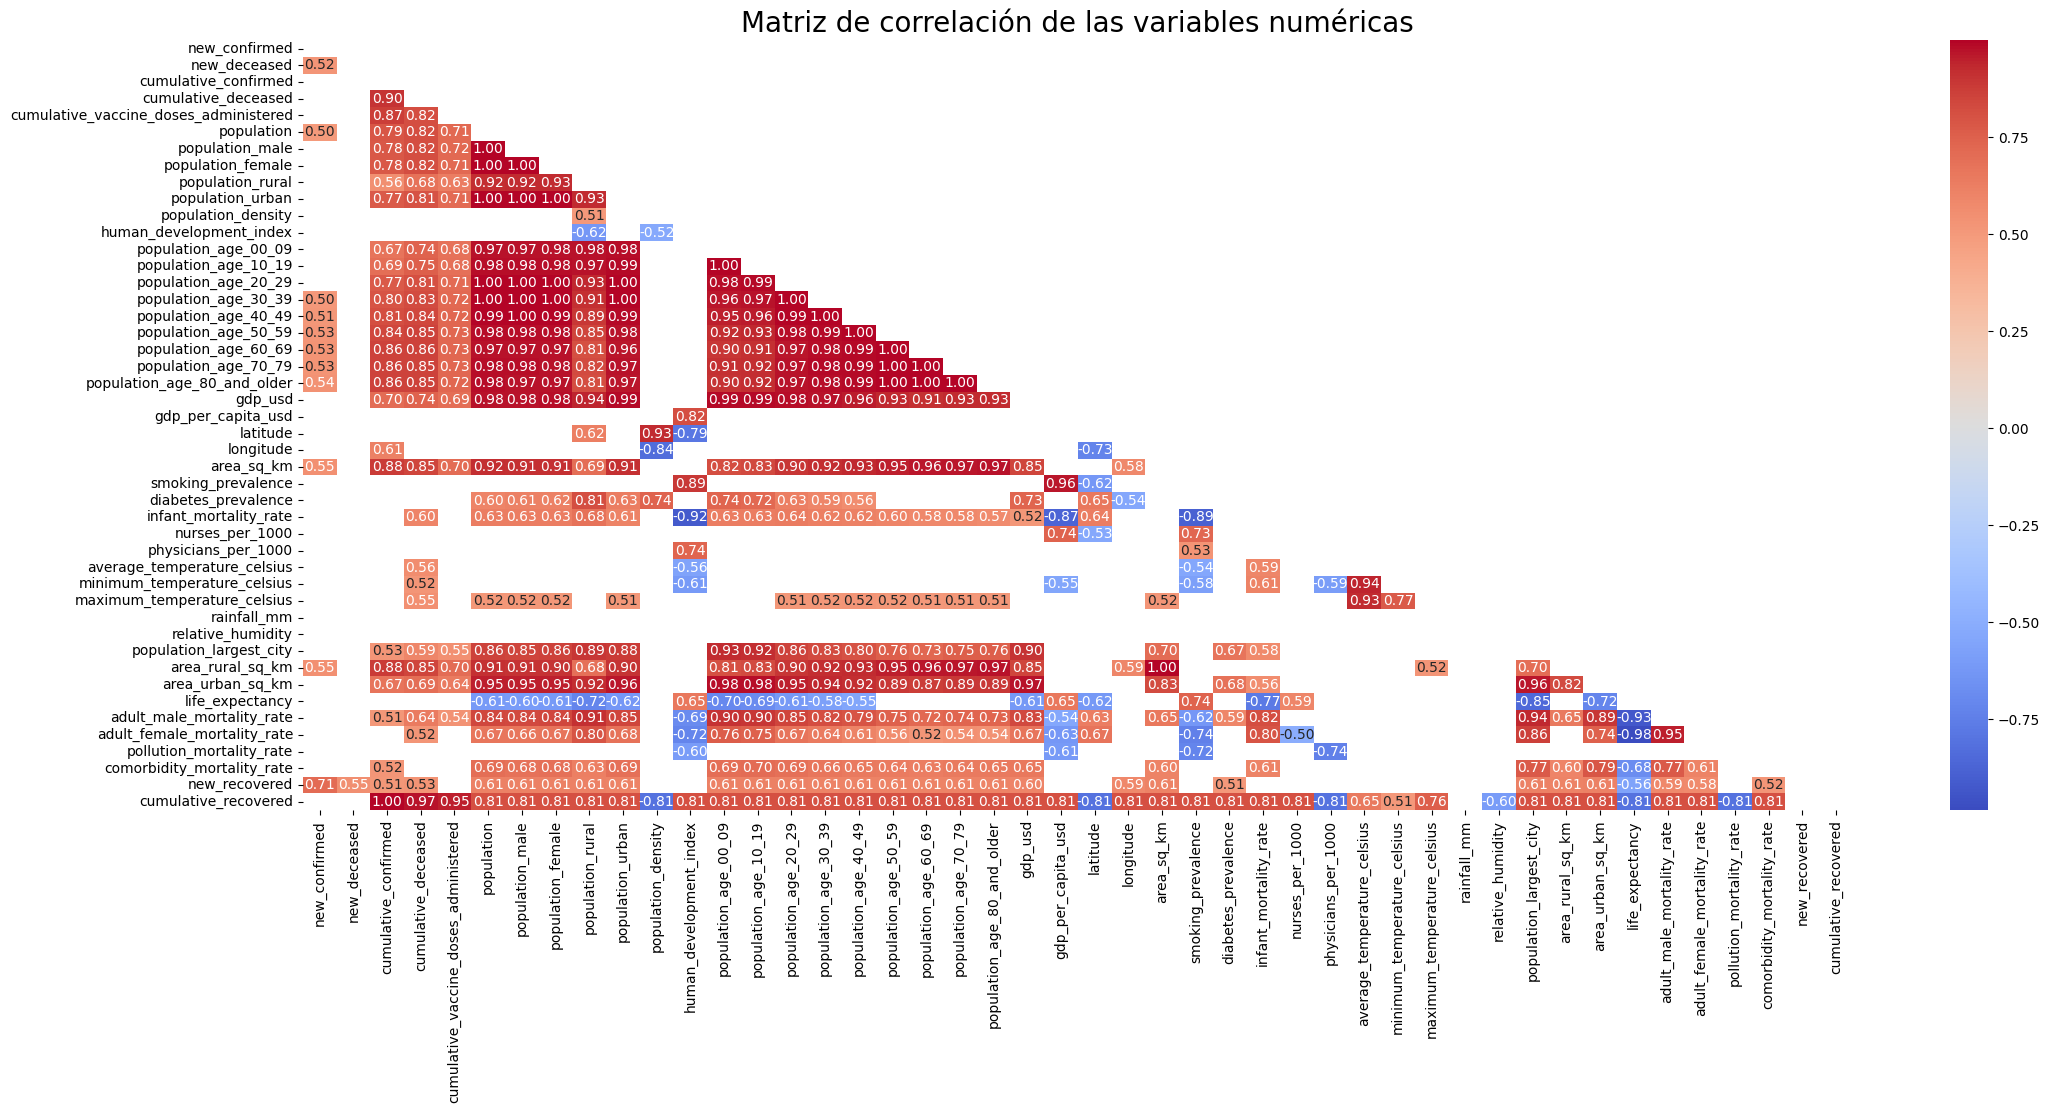

In [24]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()
#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

En la  grafica de correlacion anterior se evidencia una mayor correlacion con los colores rojos mas intensos y una menor correlacion mientras el color va distinuyendo. Se establece un umbral mayor a 0.5 y se utiliza para graficar un heatmap. No obstante para tener un analisis mas detallado entre las variables, es mejor hacer barplots utilizando un ciclo for, con e fin de hacer una revision grafica de las columnas.

In [87]:
data=data_latinoamerica_paises

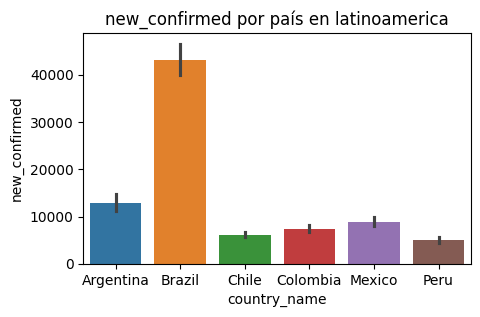

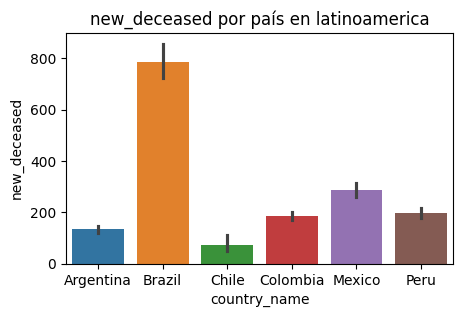

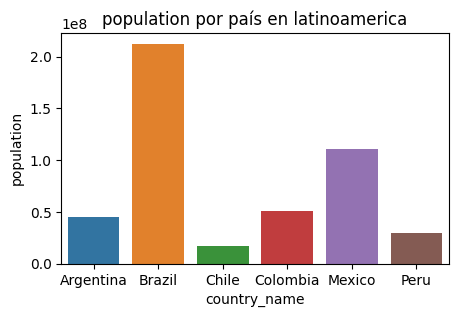

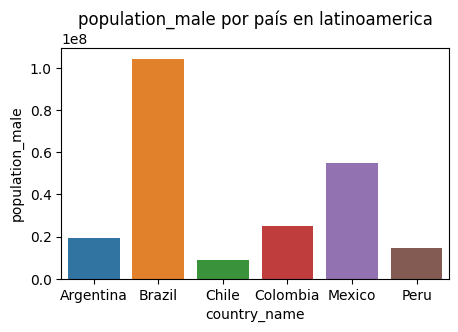

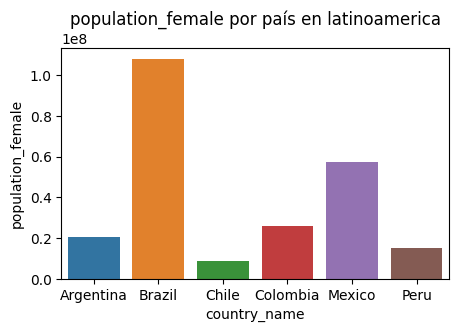

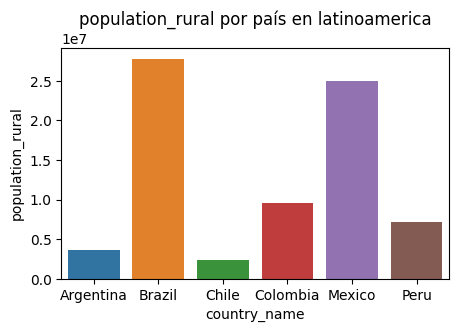

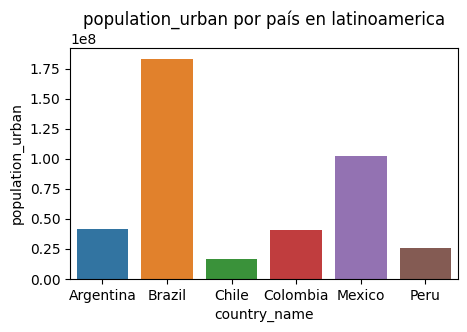

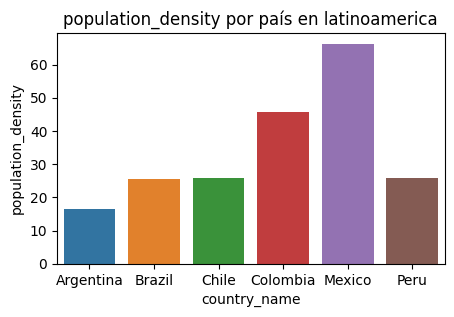

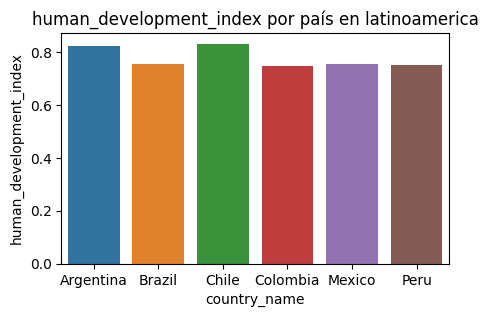

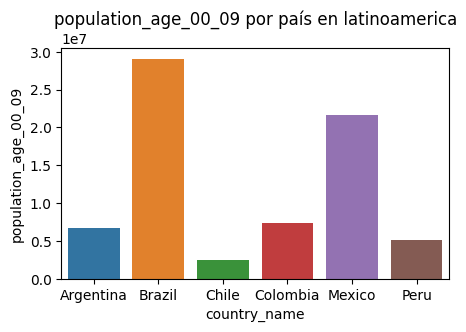

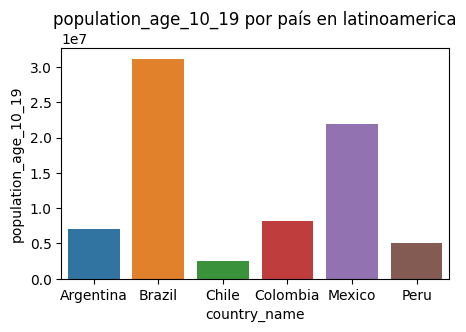

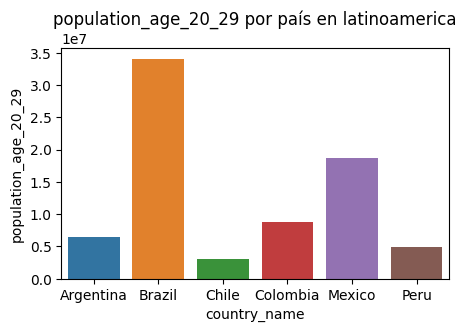

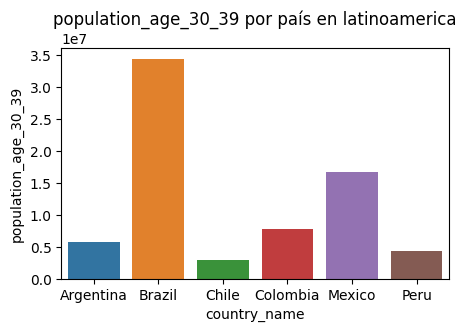

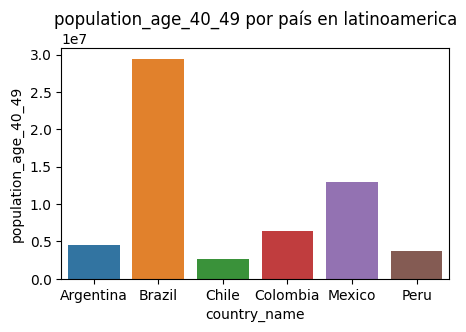

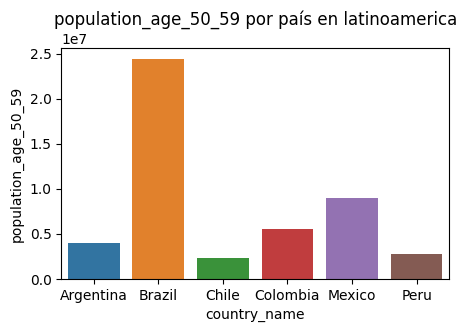

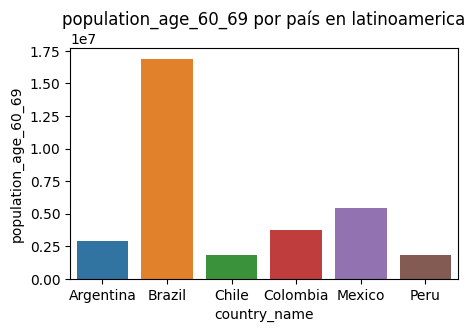

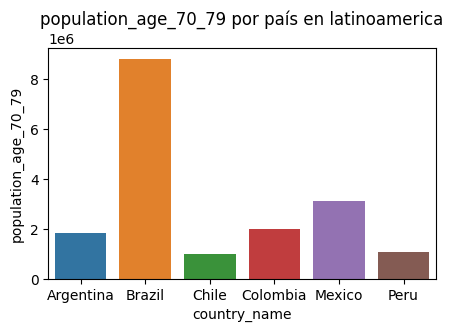

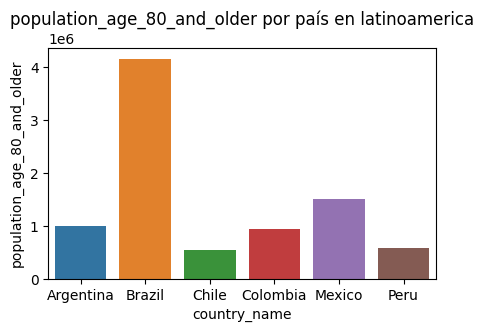

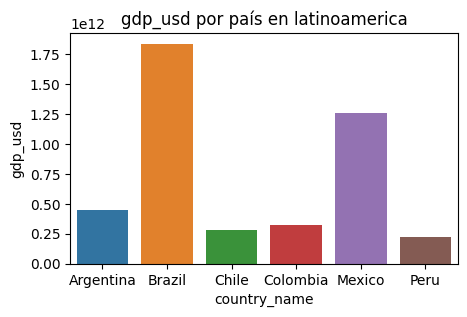

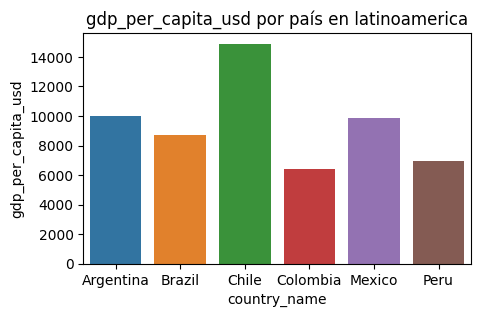

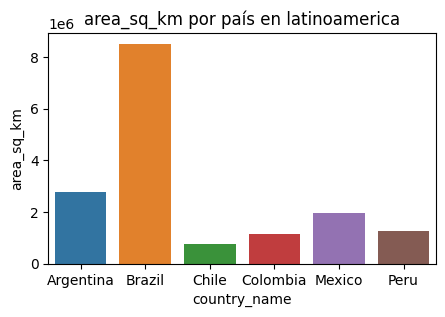

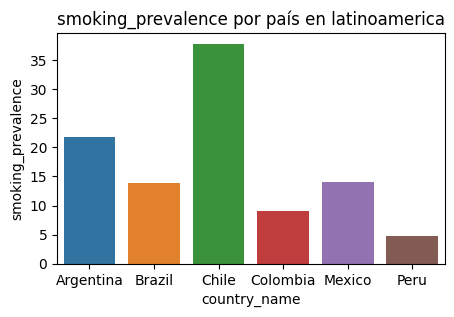

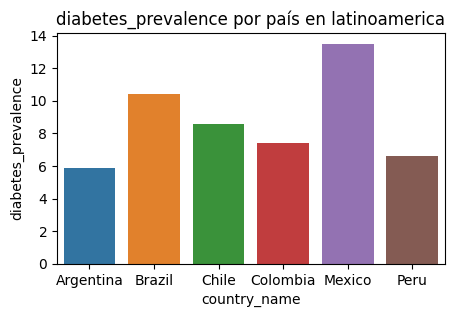

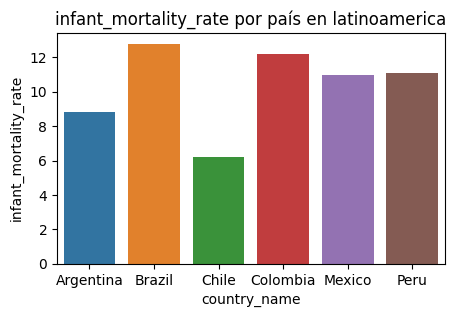

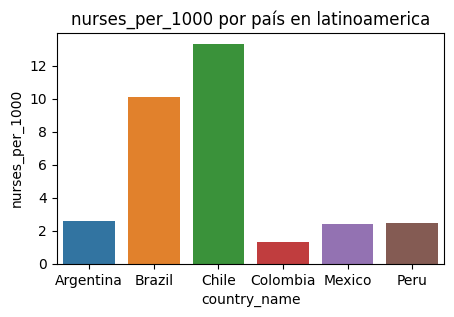

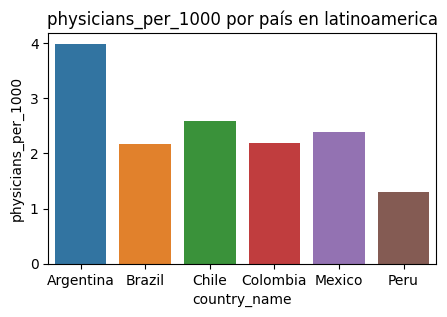

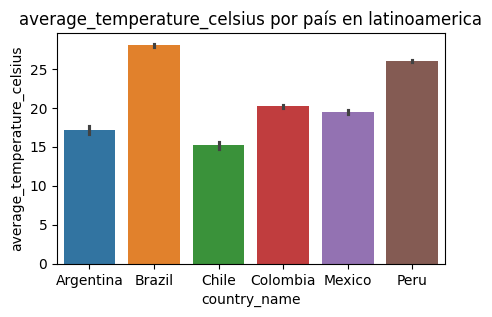

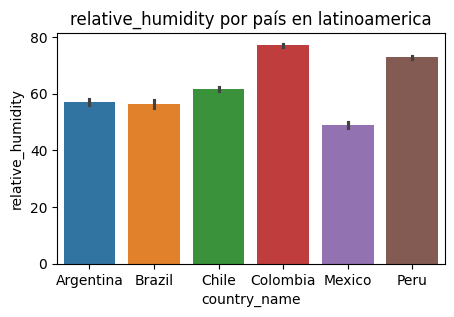

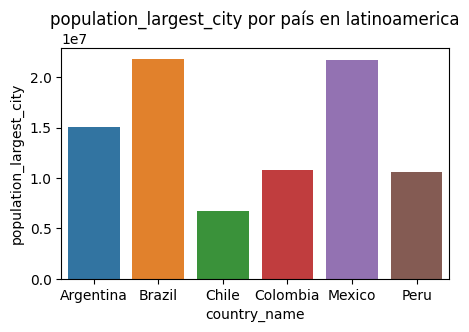

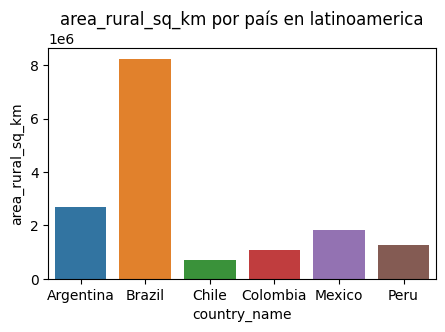

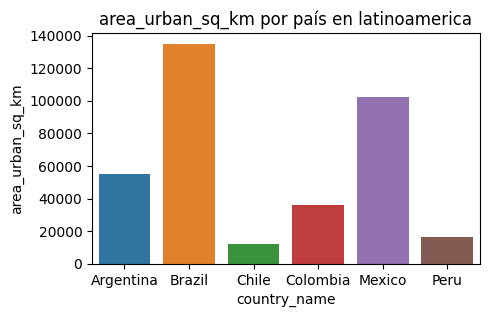

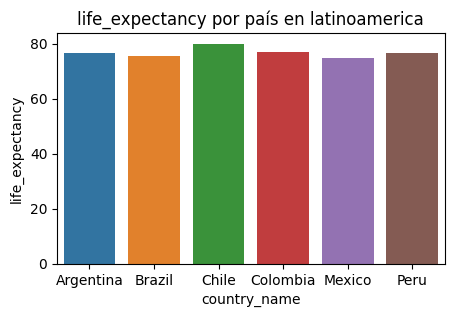

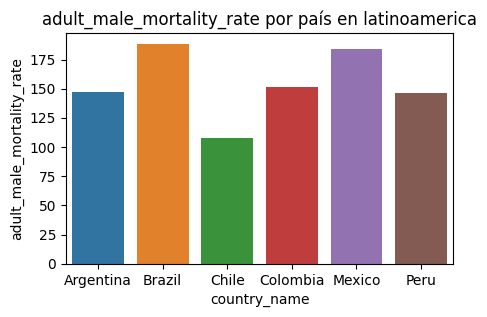

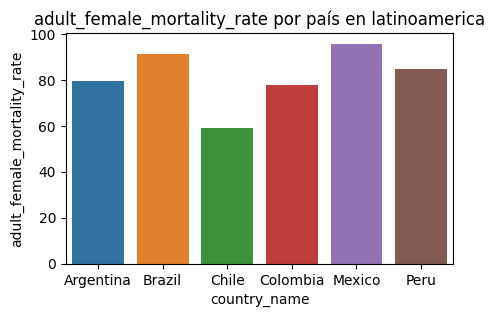

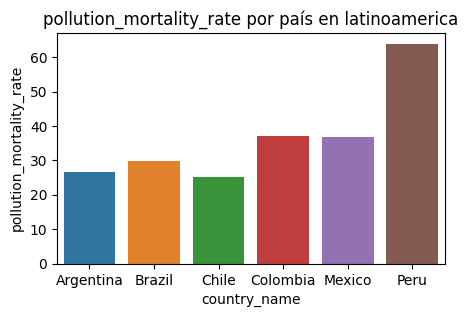

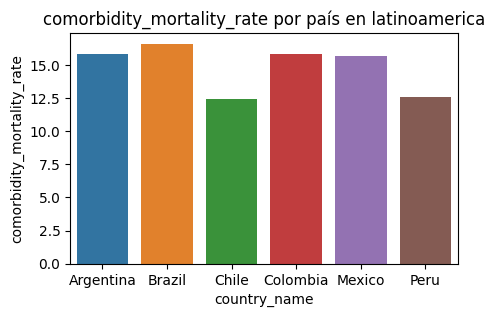

In [8]:
# Diagrama de barras para cada pais con seis columnas:
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

In [ ]:
#NOOOO EJECUTAR PARA LAS GRAFICAS ANTERIORES
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)  


Para mirar la distribucion de algunos de los datos realizo histogramas con un ciclo for como en el caso anterior

In [9]:
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]
# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data_latinoamerica_paises[i], kde=True)
        plt.title(i)
        plt.show()

De acuerdo a los datos anteriores parece que hay una relacion entre la temperatura y la humedad respecto al aumento de casos, esto es solo una apreciacion que se debe corroborar.
A continuacion se analizaran las variables de temperatura promedio (Average)temperatura y nuevos confirmados (new_confirmed), para entender su comportamiento.

Se utilizaran las bibliotecas de Seaborn y Matplotlib para crear un grafico de dispersion o subplots.


In [10]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

El anterior grafico de dispersion muestra   como con  Brazil y argentina se observa una relacion entre la temperatura y la cantidad de casos confirmados mientras que para los otros paises la temperatura poco influye en la cantidad de casos confirmados.

Debido a la relacion entre la temperatura y los casos confirmados se realizara el analisis con la temperatura promedio y la cantidad de muertes.

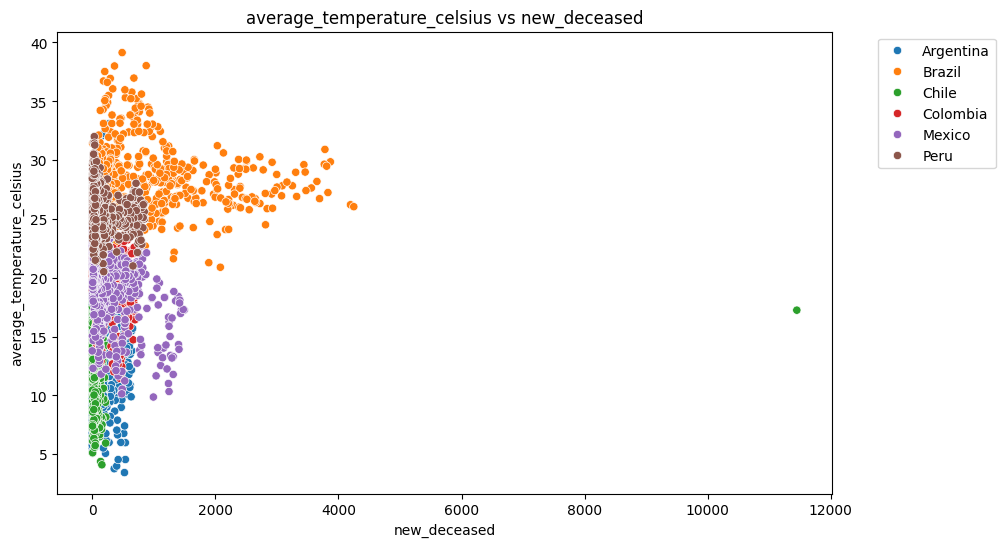

In [11]:
# Grafica temperatura promedio y cantidad de muertes.
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Este grafico muestra un comportamiento similar al anterior.
Se hace necesario mirar como se compotan las variables a lo largo del tiempo (longitudinal). Inicialmente se observaran las dosis administradas por mes en el conjunto de paises.

In [12]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

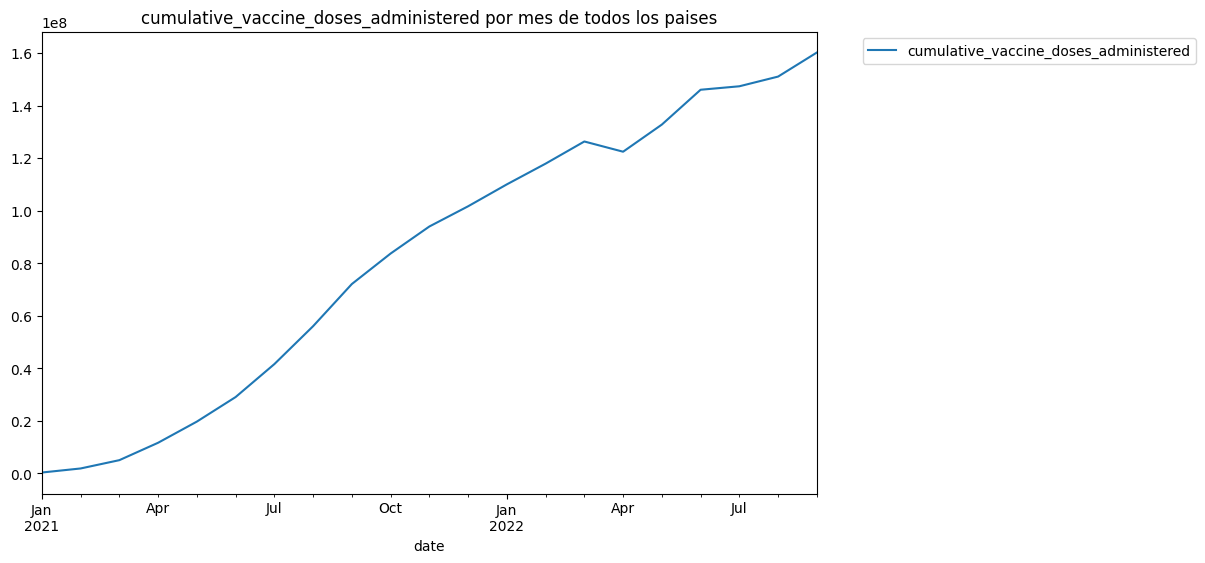

In [13]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

El grafico anterior muestra que las dosis administradas en los paises estudiados ha ido aumentado a lo largo del tiempo, aunque es una afirmacion temprana porque se requiere hacer mas analisis, por lo cual se hara una analisis de las dosos administradas por mes en cada pais.

Este código genera una gráfica que muestra la evolución mensual de las dosis acumuladas de vacunas administradas para varios países. Se itera sobre una lista de países seleccionados, se reagrupan los datos por mes, se promedia el número de dosis administradas y se visualiza en un gráfico con una leyenda para identificar a cada país.

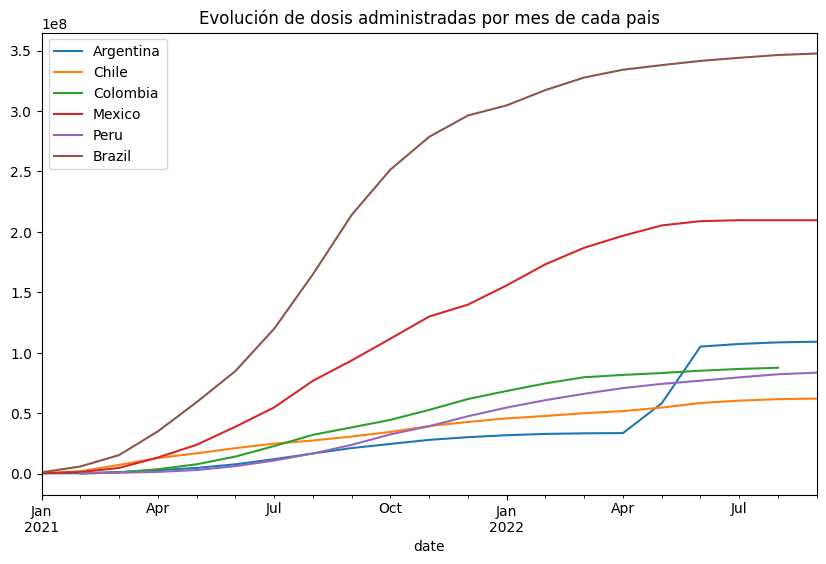

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

En el grafico se observa que las dosis administradas por mes van aumentando a traves del tiempo en la mayoria de paises. Entre los factores que pueden explicar este suceso se tiene: el numero de vacunas disponible, la evolucion de las vacunas en los pacientes, porque no solo se aplica una vacuna por paciente, la gestion del departamento de salud, los recursos para adquirirlas, entre otros.

Al analizar las muertes por mes de cada pais

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais con mas muertes es Brasil, seguido de Mexico, Colombia, Argentina, Peru y Chile. No obstante, son muchos los factores que pueden incidir en este resultado como el numero de habitantes por pais, pues Barasil es el mas poblado, el numero de datos, los recursos disponibles, entre otros. El grafico presenta una disminucion abrupta en el caso de Mexico, lo cual se debe constatar mas adelante.

Casos confirmados por mes de cada pais:


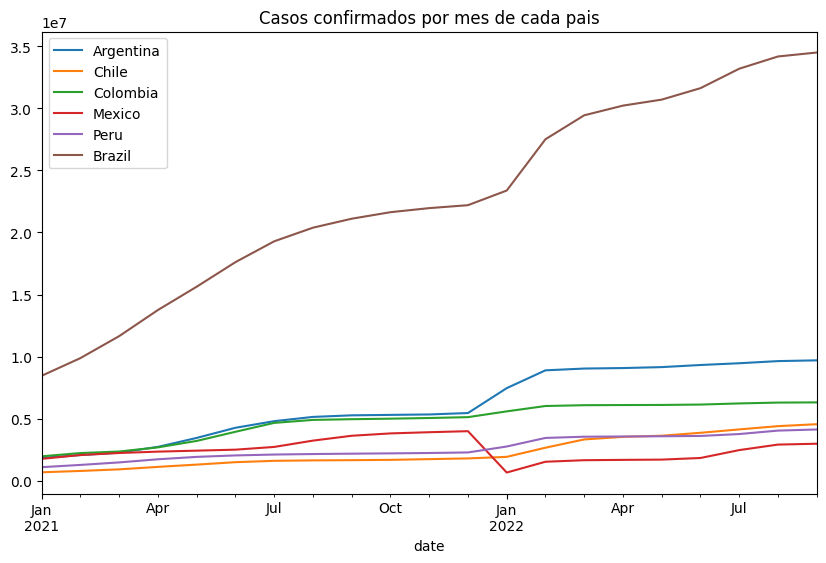

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Nuevamente Brasil aporta el mayor numero de casos confirmados, seguido de Mexico, Argentina, Colombia, Chile y Peru. Este resultado no puede estar solo en funcion del manejo de la pandemia, entre otros factores mencionados y los datos que se tienen.

Recuperaciones de casos por mes de cada pais

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais que presenta mejor recuperacin es Brasil, lo que se puede relacinar con el numero de personas y la disposicion de vacunas/

Comparacion del numero de casos nuevos entre paisis de America Latina

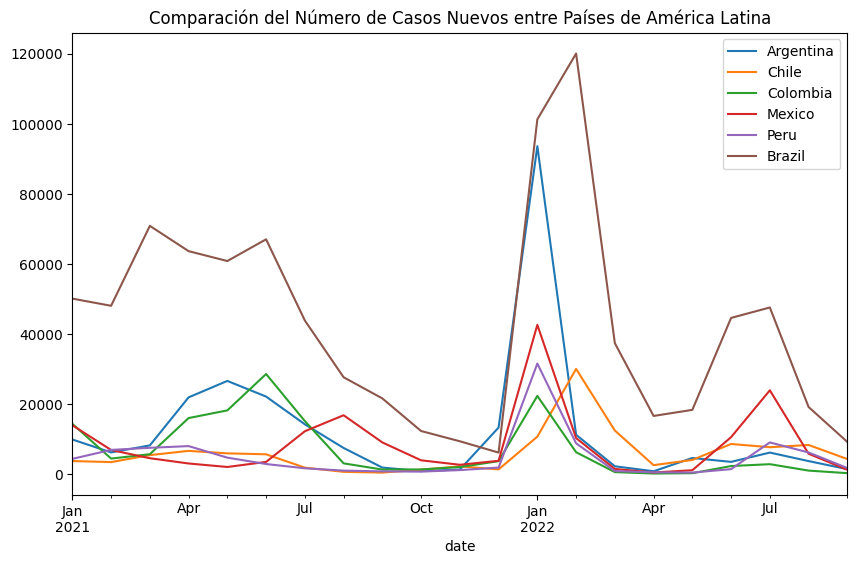

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Chile presenta una menor cantidad de casos confirmados, se le ve menos fluctuacion en la grafica, seguido de Peru, Argentina, Colombia, Mexico y Brasil.

Distribucion de dosis acumuladas por pais


In [23]:
data_latinoamerica_paises = data_latinoamerica_paises.reset_index(drop=True)


In [24]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

El grafico de Kernel muestra que el pais que peor manejo la pandemia fue Brasil, seguido de Mexico, Colombia, Argentina, Peru y Chile. Muestra una desproporcionada cantidad de vacunas adiministradas,  tambien mayor la cantidad de muertos y casos confirmados.

Temperatura media por pais:

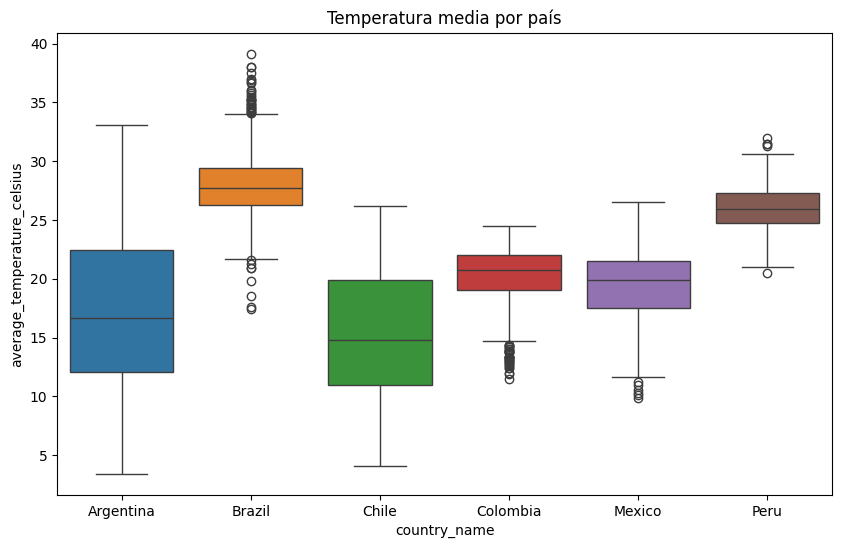

In [25]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

Chile sigue presentando indicios que ha manejado mejor la pandemia que otros paises. 
De acurdo a los datos analizados anteriormente se puede afirmar que en los paises donde hay mas casos confirmados y muertes se pueden crear los nuevos centros, porque alli se necesita mas apoyo, no obstante se debe tener en cuenta la infraestructura, el acceso a servicios, el capital humano, entre otros. Este es solo un primer acercamiento, por lo tanto se deben hacer analisis mas detallados para tomar decisiones acertadas.
En seguida se mira el comportamiento de las variables a traves de vilinplots/

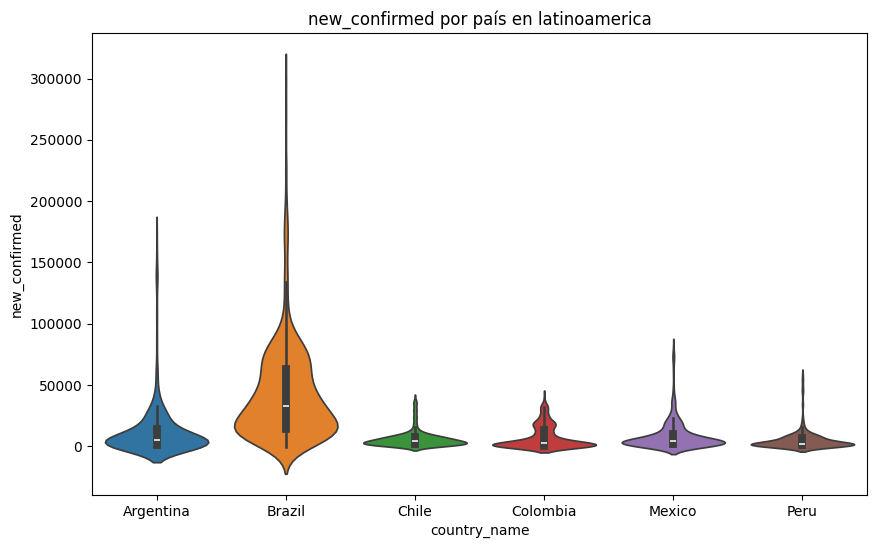

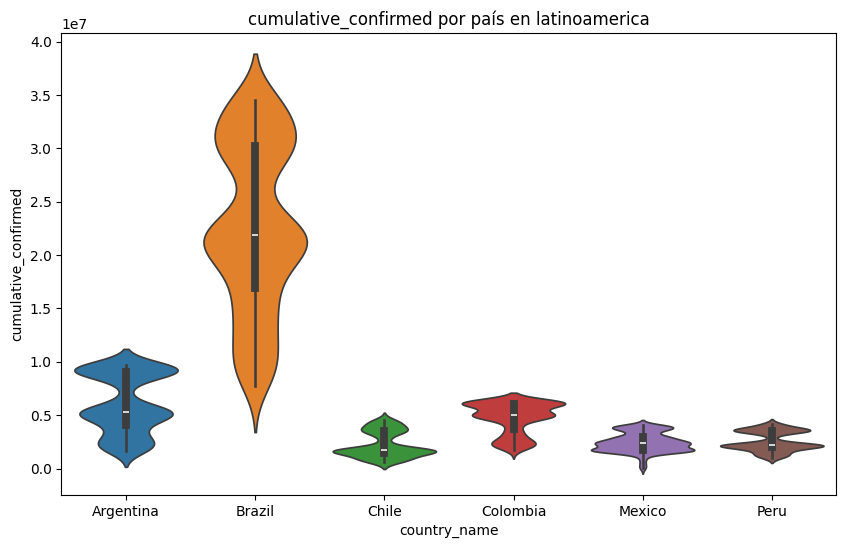

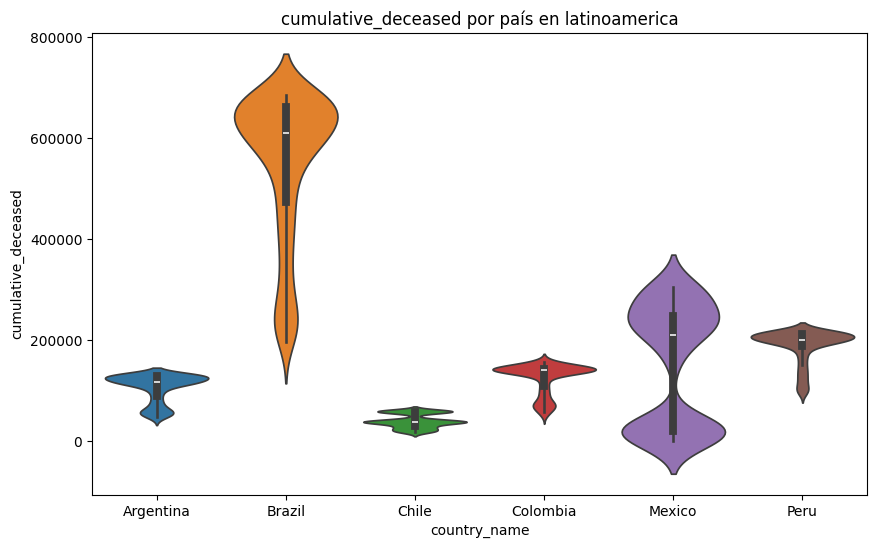

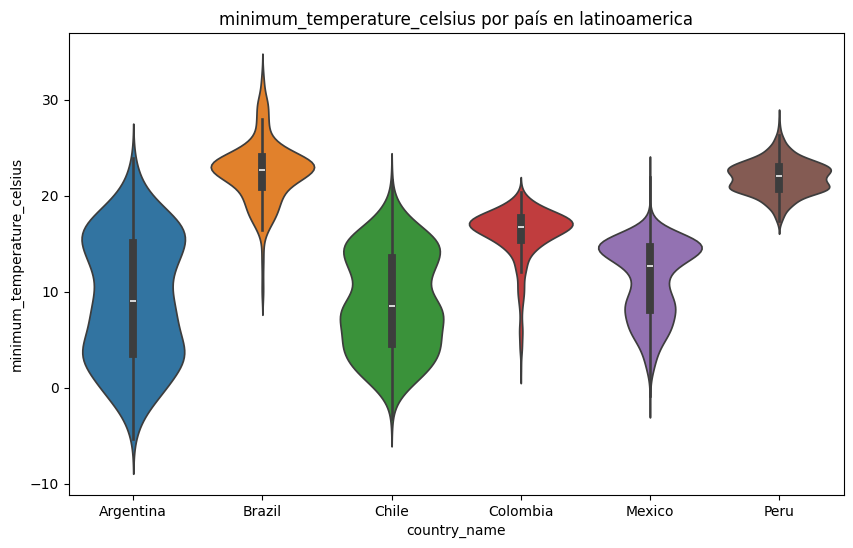

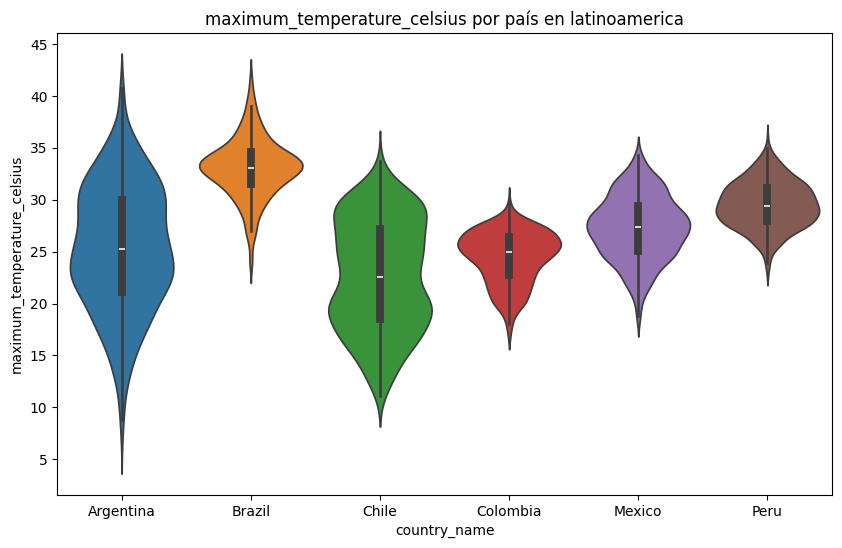

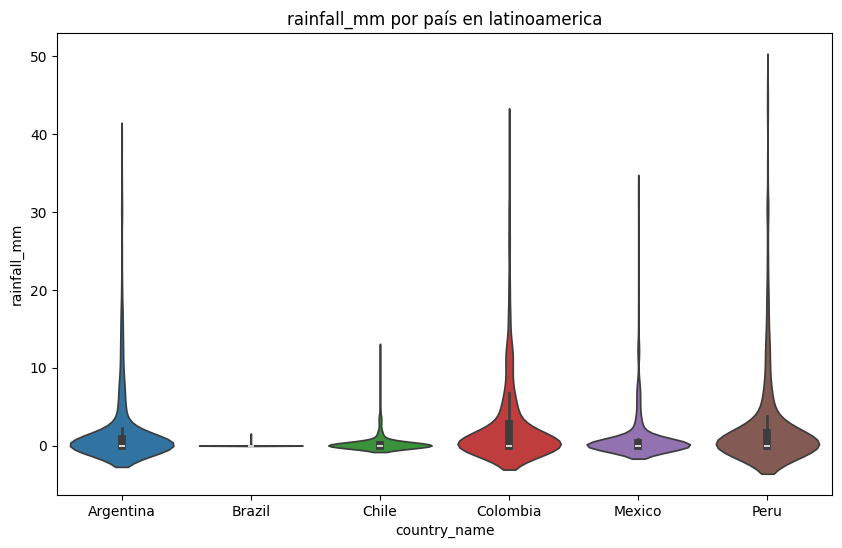

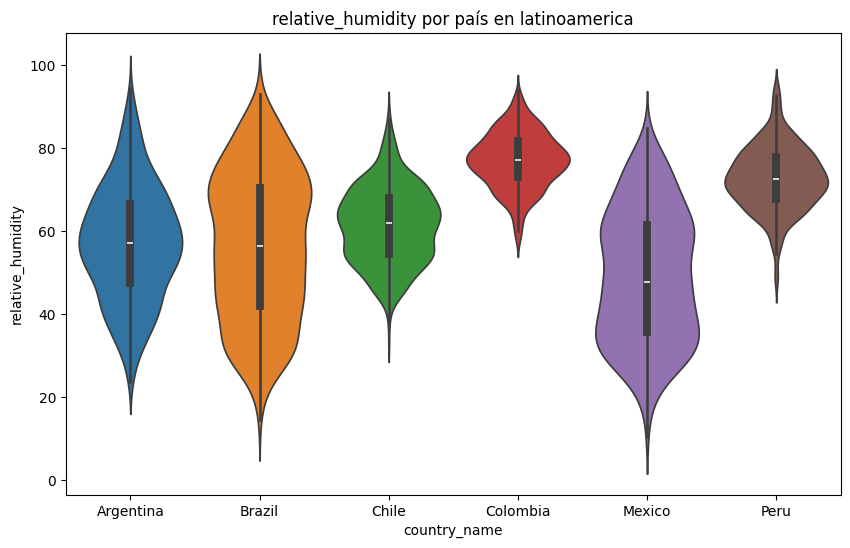

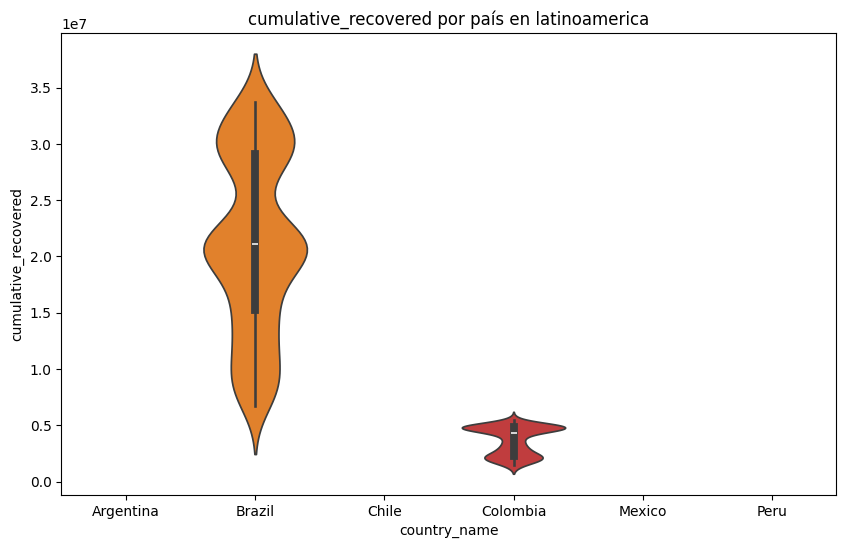

In [26]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

Para tratar de entender como se comporta la poblacion de acuerdo a cada pais, se analiza la distribucion de la poblacion por grupos de edad. Esto puede aportar en la toma de decisiones:

In [6]:
data_latinoamerica_paises = pd.read_csv('C:/Users/usuario/Desktop/Sandra/Phyton Class/m4_python\proyecto_integrador/DatosFinalesFiltrado.csv')
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date")
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru         1150.0   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    NaN  29381884.0   
2022-09-14                                    NaN  29381884.0   
2022-09-15                                    NaN  29381884.0   
2022-09-16                                    NaN  29381884.0   
2022-09-17                                    NaN  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09          72354498.00
population_age_10_19          75821668.00
population_age_20_29          75953404.00
population_age_30_39          72153175.00
population_age_40_49          59596656.00
population_age_50_59          47961620.00
population_age_60_69          32654396.00
population_age_70_79          17789478.00
population_age_80_and_older    8711719.00
dtype: float64

Ahora se calcula la distribucion de la poblacion por grupos de edad

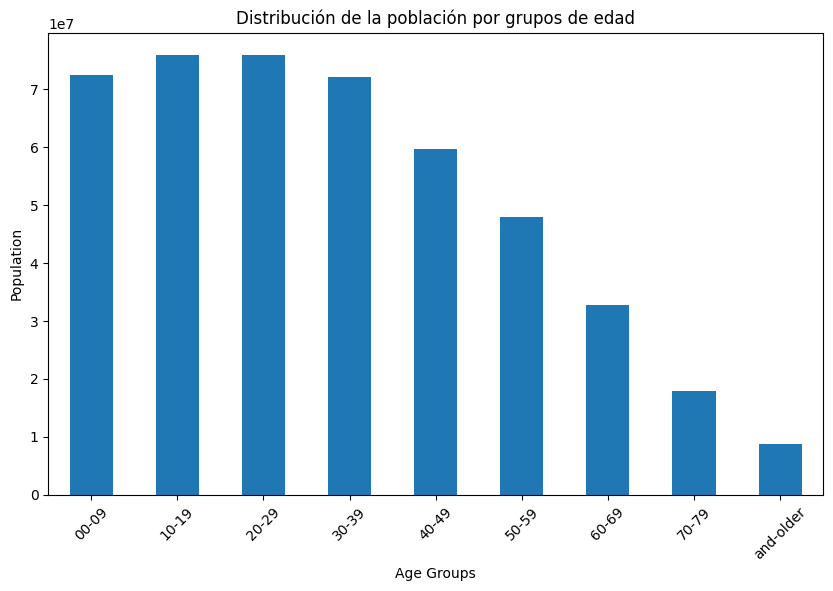

In [9]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

Esta grafica muestra como se comporta la poblacion por grupo etareo, donde a mayor edad se evidencia menor poblacion a partir del grupo etareo de  10 y 19 anos. Tambien se puede graficar la cantidad de vacunas por cada grupo etareo:

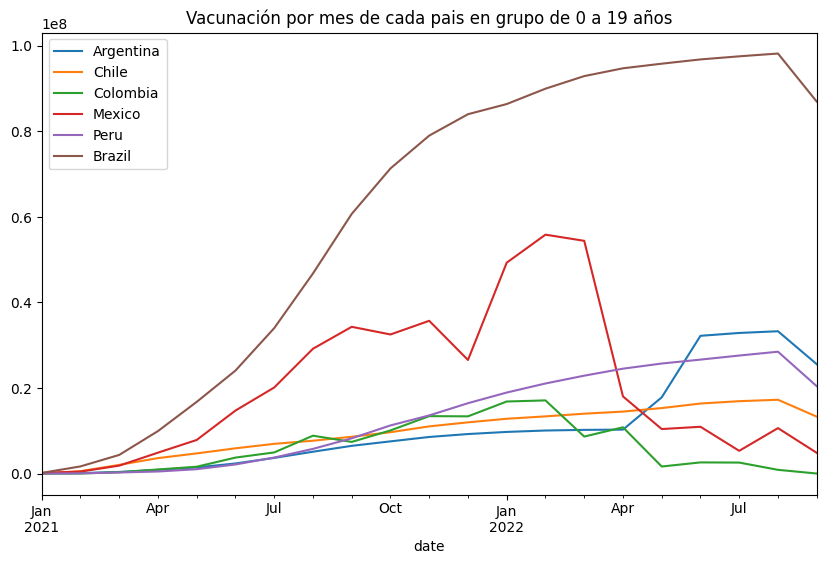

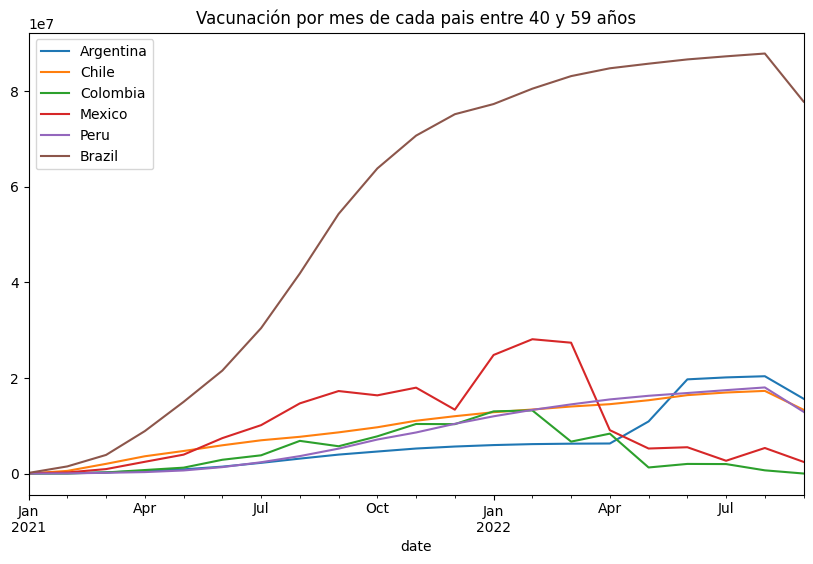

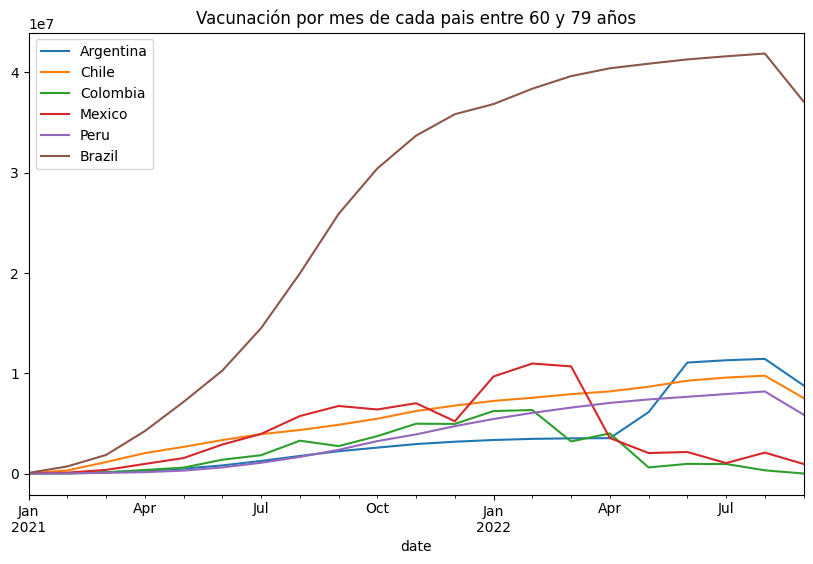

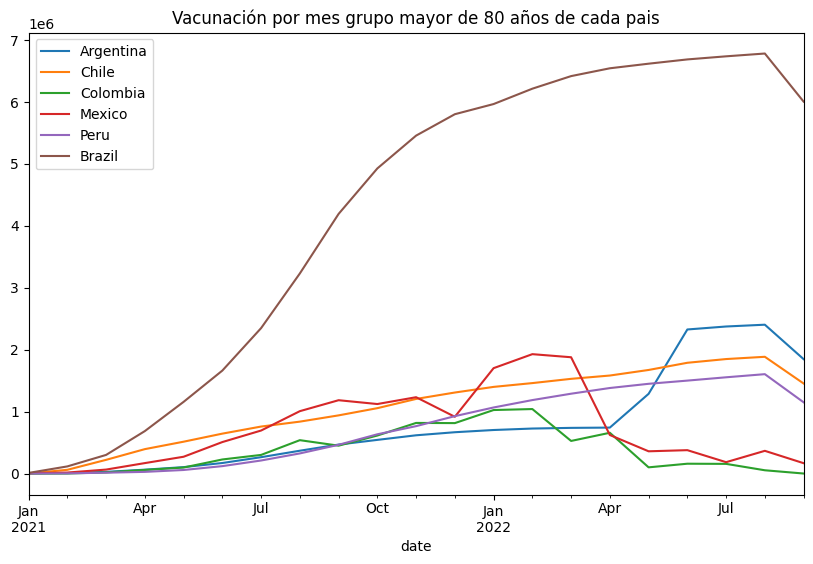

In [12]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Para identificar la poblacion mas vulnerable encada pais, se revisa la mortalidad por genero, lo caul se puede tener en cuenta a la hora de determinar cual seria la  poblacion que se debe vacunar primero.

Se crea una grafica de barras apiladas para comparar la tasa de mortalidad femenina y masculina,  utilizando la biblioteca seaborn para visualización y matplotlib para configurar la figura.

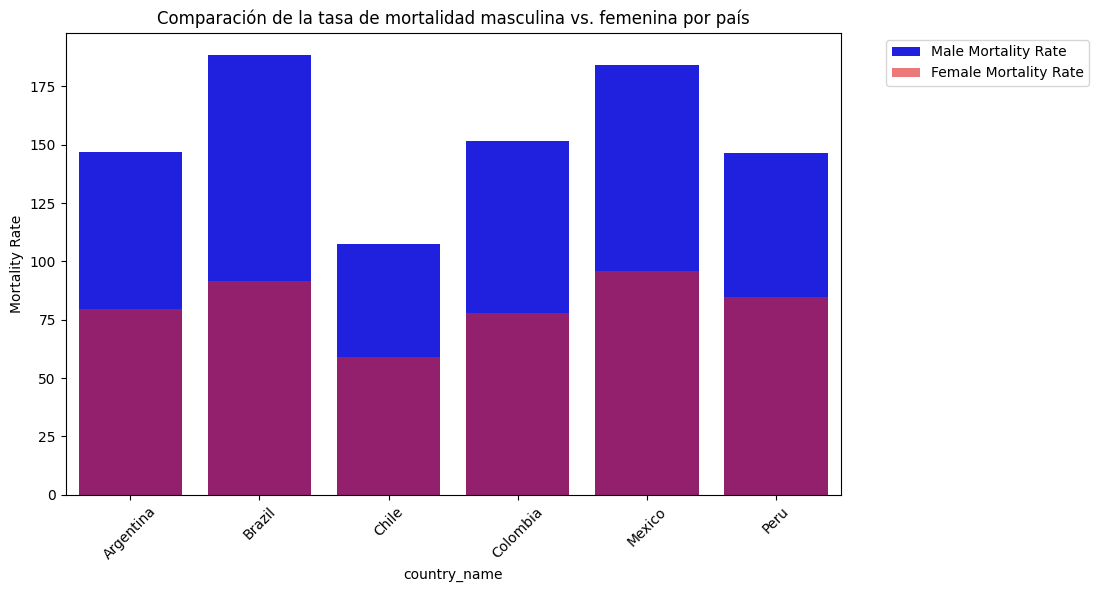

In [13]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo al grafico anterior, la cantidad de muertes es mayor en hombres que en mujeres, al parecer un grupo mas vulnerables o estan menos protegidos.
Tambien se puede analizar si hay alguna enfermedad que  sea mas comun en los paises seleccionados y que haya causado mas muertes, su correlacion y observarlas en mas detalle:

Se utiliza un mapa de calor o heatmap para visualizar la correlacion entre las variables.

In [17]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

En el anterior grafico se evidencia que el fumar y la diabetes son enfermedades que mas afectan a la poblacion. Se puede afirmar que esas enfermedades son las que mas han causado muertes. No obstante, estas no seran las unicas enfermedades, sino las mas comunes.
Para ampliar el analisis, se puede analizar la mortalidad por enfermedades preexistentes o comorbilidades, es decir que tengan las dos o mas al tiempo.

In [19]:
data_latinoamerica_paises = data_latinoamerica_paises.reset_index(drop=True)

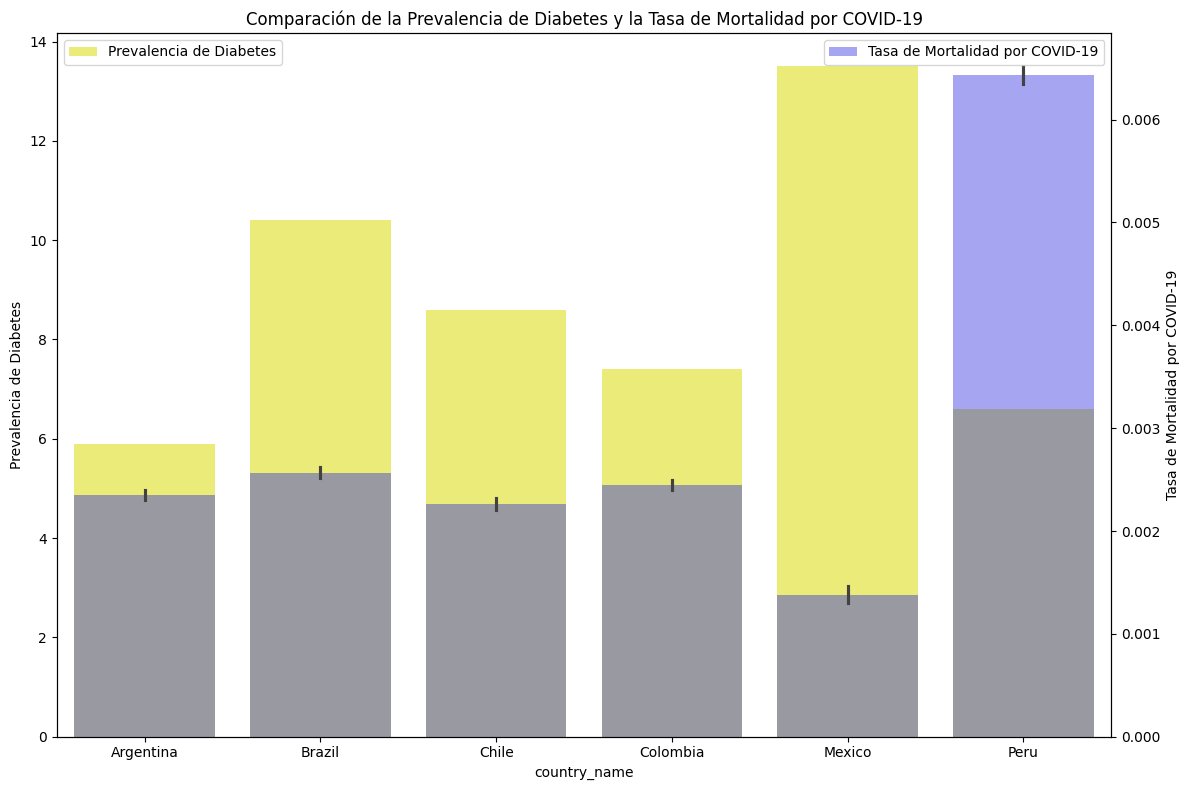

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

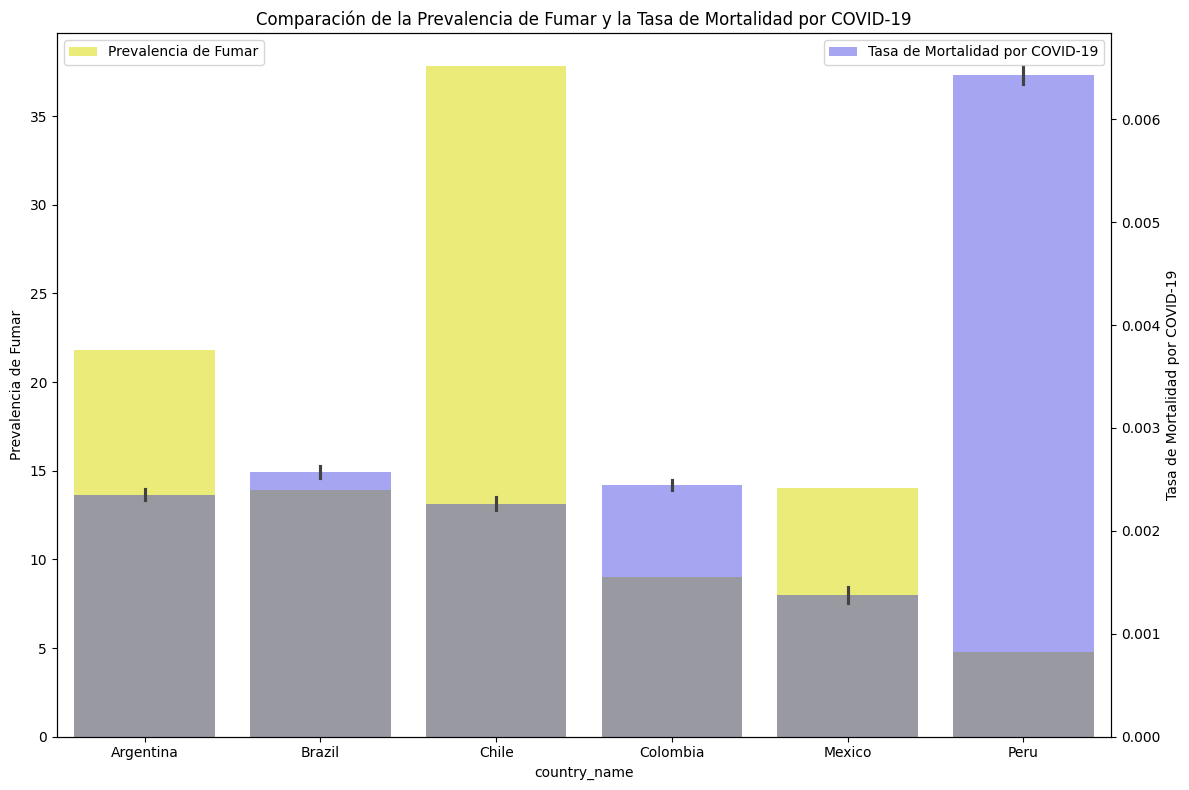

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

De acuerdo a las graficas anteriores, la diabetes ha causado mas muertes seguido de fumar.Estas enfermedades son las que mas han causado muertes, teniendo en cuenta que no son las unicas.
Entre los paises que se requiere mas ayuda son Brasil, Mexico y Colombia, porque tienen mas muertes y casos confirmados y tambien estos paises son los que menos vacunas han administrado. 

AVANCE 3

Cargo las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Consigna: Realizar un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 

In [2]:
#Primero traigo el archivo filtrado que he estado trabajando
data_latinoamerica_paises = pd.read_csv("C:/Users/usuario/Desktop/Sandra/Phyton Class/m4_python/proyecto_integrador/DatosFinalesFiltrado.csv")
data_latinoamerica_paises

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina         7767.0   
1              AR  2021-01-03           AR    Argentina         4934.0   
2              AR  2021-01-04           AR    Argentina        13953.0   
3              AR  2021-01-05           AR    Argentina        14085.0   
4              AR  2021-01-06           AR    Argentina        14496.0   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru         1150.0   
3740           PE  2022-09-14           PE         Peru            NaN   
3741           PE  2022-09-15           PE         Peru            NaN   
3742           PE  2022-09-16           PE         Peru            NaN   
3743           PE  2022-09-17           PE         Peru            NaN   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0            166.0             1670634.0              46688.0   
1            157.0             1675568.0              46845.0   
2            157.0             1689521.0              47002.0   
3            160.0             1703606.0              47162.0   
4            131.0             1718102.0              47293.0   
...            ...                   ...                  ...   
3739          22.0             4127612.0             216173.0   
3740           NaN                   NaN                  NaN   
3741           NaN                   NaN                  NaN   
3742           NaN                   NaN                  NaN   
3743           NaN                   NaN                  NaN   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    NaN  29381884.0  ...   
3740                                    NaN  29381884.0  ...   
3741                                    NaN  29381884.0  ...   
3742                                    NaN  29381884.0  ...   
3743                                    NaN  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [3]:
#Miro la informacion genera del df
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3723 non-null   float64
 5   new_deceased                           3723 non-null   float64
 6   cumulative_confirmed                   3723 non-null   float64
 7   cumulative_deceased                    3723 non-null   float64
 8   cumulative_vaccine_doses_administered  3160 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [52]:
#coloco indice como fecha para trabajar series temporales
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date")
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                    NaN 29381884.00   
2022-09-14                                    NaN 29381884.00   
2022-09-15                                    NaN 29381884.00   
2022-09-16                                    NaN 29381884.00   
2022-09-17                                    NaN 29381884.00   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02      19523766.00  ...              15057273.00        2690269.00   
2021-01-03      19523766.00  ...              15057273.00        2690269.00   
2021-01-04      19523766.00  ...              15057273.00        2690269.00   
2021-01-05      19523766.00  ...              15057273.00        2690269.00   
2021-01-06      19523766.00  ...              15057273.00        2690269.00   
...                     ...  ...                      ...               ...   
2022-09-13      14450757.00  ...              10554712.00        1256339.00   
2022-09-14      14450757.00  ...              10554712.00        1256339.00   
2022-09-15      14450757.00  ...              10554712.00        1256339.00   
2022-09-16      14450757.00  ...              10554712.00        1256339.00   
2022-09-17      14450757.00  ...              10554712.00        1256339.00   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02          55032.00            76.52                     147.09   
2021-01-03          55032.00            76.52                     147.09   
2021-01-04          5503

In [6]:
#Se anade una nueva columna al df llamada week, donde muestra el numero de semana en que cae la fecha del indice
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru         1150.0   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    NaN  29381884.0   
2022-09-14                                    NaN  29381884.0   
2022-09-15                                    NaN  29381884.0   
2022-09-16                                    NaN  29381884.0   
2022-09-17                                    NaN  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

Lo anterior para analizar un comportamiento semanal y anual, para lo cual se agrupan los datos por semana y por ano usando Groupby:

In [8]:

data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [9]:
#casos semanales en 2021
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [10]:
#lista de paises unicos
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

A continuacion se que tiene el total de nuevos casos y muertes por semana para cada país, para  analiza cómo evolucionan los casos y muertes por COVID-19 en países de América Latina a lo largo del tiempo, agrupados por semana.

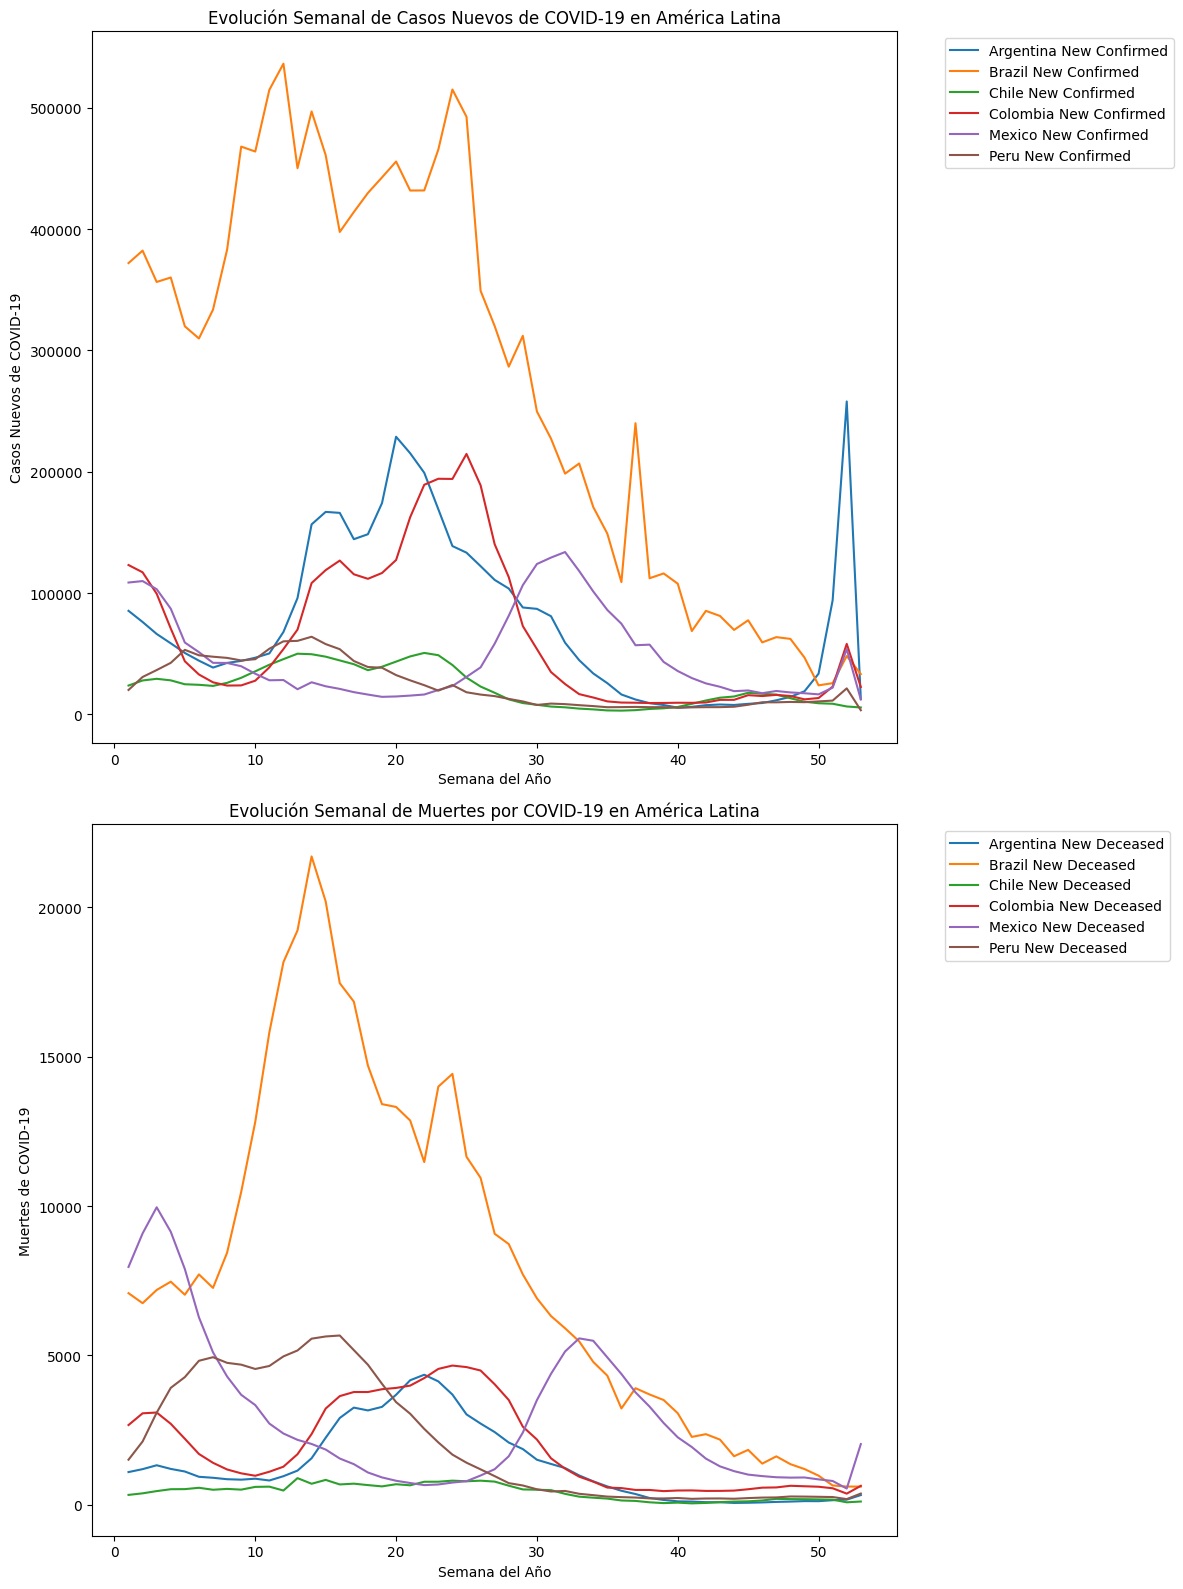

In [11]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Al incrementarse las semanas, con el paso del tiempo en general las muertes disminuyen, pero hay varios picos donde se vuelve a incrementar el numero de muertes, esto puede deberse a multiples factores como el timpo transcurrido entre una dosis y la otra, los recursos con que se cuenta, los cuidados que se tienen, entre otros.

C:\Users\usuario\AppData\Local\Temp\ipykernel_14572\256795076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore


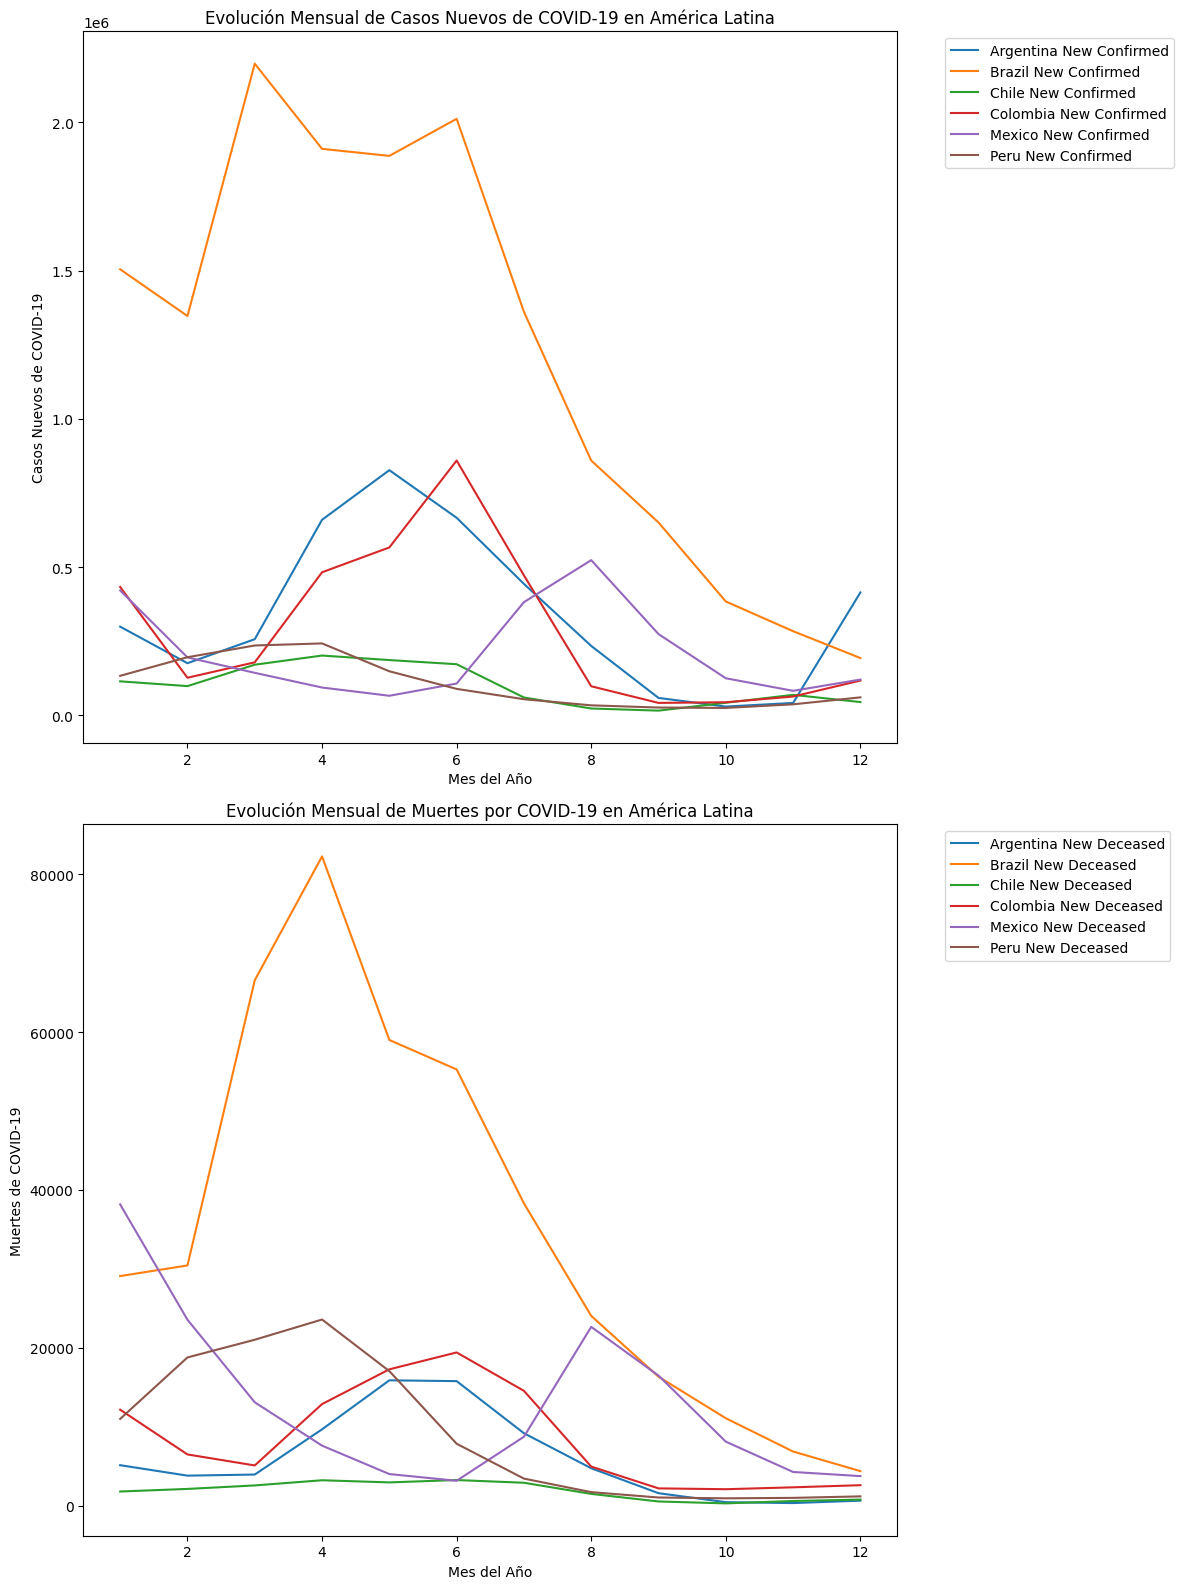

In [12]:
#ahora se ve  por mes del año
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Se evidencia en los graficos anteriores que los casos confirmados han disminuido a lo largo del tiempo. No significa que se haya terminado la pandemia, pues siguen presentandose muertes, lo que se puede constatar con los pequenos picos que se presentan al final de la grafica antepenultima.

4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:

    - **Evolución de Casos Activos vs. Recuperados**
    - **Tasa de Crecimiento (%)**
    - **Relación entre la Cobertura de Vacunación y la Reducción de Casos**
    - **('País') Progreso de la vacunación por país**
    - **Nuevos casos y temperatura promedio**
    - **Impacto de la Urbanización en la Propagación del Covid-19**
    - **Evolución Semanal de Casos Nuevos**
    - **Evolución Anual de Casos Nuevos**
    - **Distribución de la Población por Edad en Países**
    - **Comparación de Estrategias de Vacunación en América Latina**
    - **Evolución del Número de Muertes Diarias**
    - **Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad**
    - **Variación Mensual de Casos y Muertes**
    - **Análisis Temporal de la Mortalidad**
    - **Comparación de la Situación Actual (Contexto de los datos)**


In [13]:
#Visualizo el df
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru         1150.0   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    NaN  29381884.0   
2022-09-14                                    NaN  29381884.0   
2022-09-15                                    NaN  29381884.0   
2022-09-16                                    NaN  29381884.0   
2022-09-17                                    NaN  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

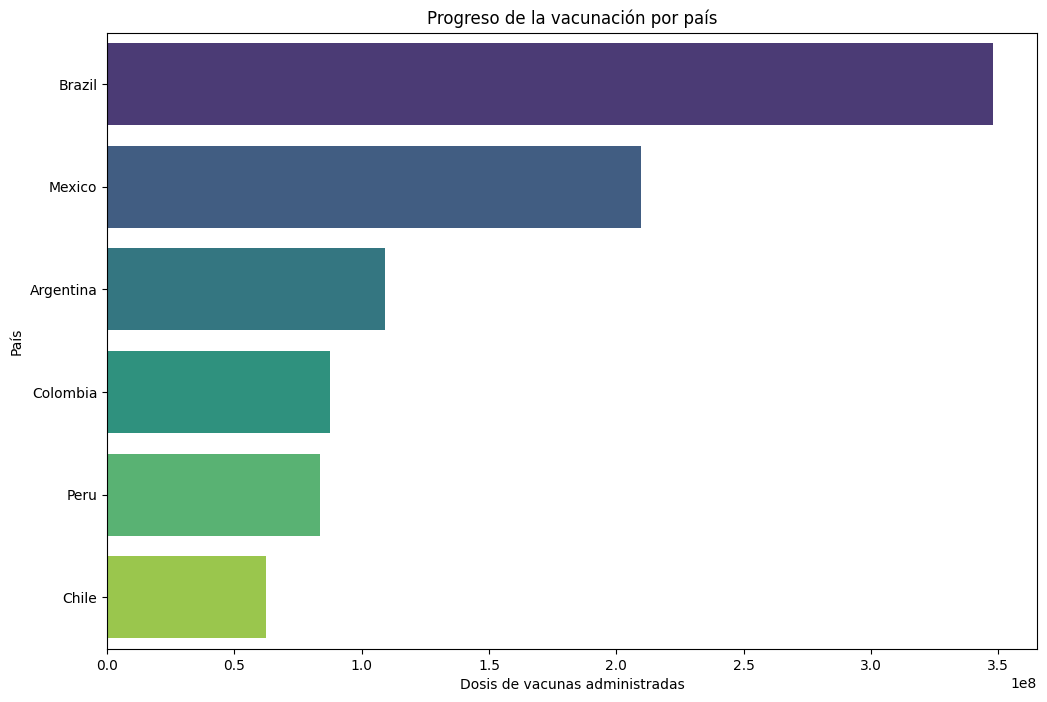

In [14]:
# - Comparación de Estrategias de Vacunación en América Latina
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

El grafico muestra qu el pais con mayor numero de dosis administradas es Brasil, seguido de Mexico Argentina, Colombia, Peru y Chile, aunque tambien se debe tener en cuenta la poblacion de cada pais, la cantidad de vacunas disponibles y otros factores mencionados que pueden influir en esas cifras.

Tambien se debe mirar la temperatura y su comportaminto en los paises mencionados:

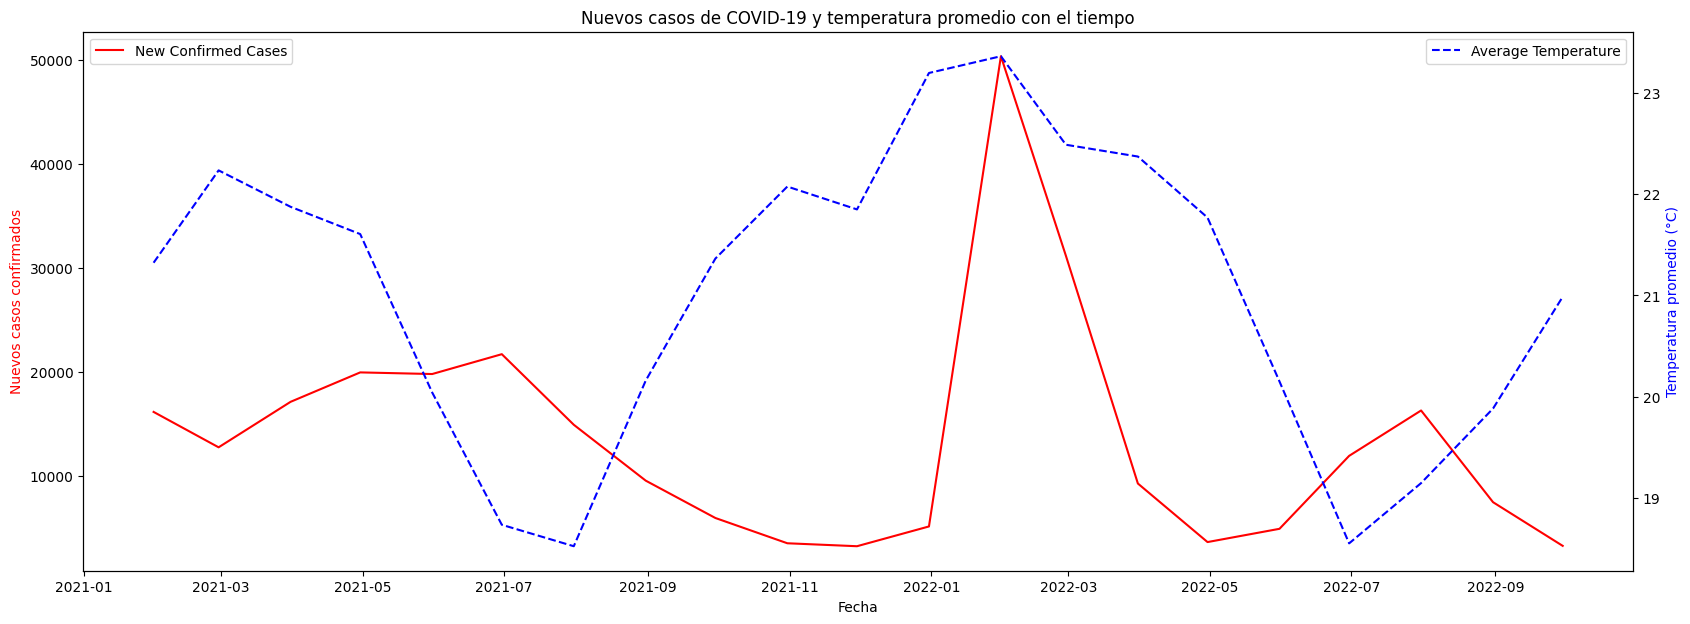

In [15]:
# - Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades en el mismo gráfico.
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Se observa que la temperatura ha ido aumentando, aunque presenta tres picos altos. Los casos confirmados aunque presentan dos picos altos han ido disminuyendo, esto puede ser por las vacunas suministradas, los habitos de cuidado o incremento en las personas vacunadas, entre otros factores.

Se naliza la urbanizacion y la densidad de poblacion ya que son variables que pueden impactar en el estudio del caso.

In [16]:
#Observo las  columnas que contiene el df
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [17]:
pd.set_option('display.float_format', '{:.2f}'.format) #para que me entregue dos decimales

In [18]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00                   NaN
2022-09-15 29381884.00       25390339.00                   NaN
2022-09-16 29381884.00       25390339.00                   NaN
2022-09-17 29381884.00       25390339.00                   NaN

[3744 rows x 3 columns]

In [19]:
# -Impacto de la Urbanización en la Propagación del Covid-19
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO           0.00          0.00   
Brazil                 BR           BR        9931.00         82.00   
Peru                   PE           PE        1150.00         22.00   
Argentina              AR           AR           0.00          0.00   
Mexico                 MX           MX         631.00          0.00   
Chile                  CL           CL        1906.00         10.00   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                6304317.00            141708.00   
Brazil                 34568833.00            685203.00   
Peru                    4127612.00            216173.00   
Argentina               9697763.00            129830.00   
Mexico                  2978564.00             23985.00   
Chile                   4568495.00             60822.00   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                87566541.00  50882884.00   
Brazil                                 347868481.00 212559409.00   
Peru                                    83624934.00  29381884.00   
Argentina                              109204825.00  44938712.00   
Mexico                                 209673612.00 110991953.00   
Chile                                   62204235.00  17574003.00   

              population_male  population_female  ...  life_expectancy  \
country_name                                      ...                    
Colombia          24984564.00        25898320.00  ...            77.11   
Brazil           104435783.00       108123626.00  ...            75.67   
Peru              14450757.00        14931127.00  ...            76.52   
Argentina         19523766.00        20593330.00  ...            76.52   
Mexico            54855231.00        57481307.00  ...            74.99   
Chile              8972014.00         8601989.00  ...            80.04   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                         151.62                        78.00   
Brazil                           188.53                        91.42   
Peru                             146.37                        84.81   
Argentina                        147.09                        79.48   
Mexico                           184.38                        95.81   
Chile                            107.67                        59.03   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                         37.00                       15.80   
Brazil                           29.90                       16.60   
Peru                             63.90                       12.60   
Argentina                        26.60                       15.80   
Mexico                           36.70                       15.70   
Chile                            25.30                       12.40   

              new_recovered  cumulative_recovered  week  \
country_name                                              
Colombia           25465.00            5441021.00    37   
Brazil              9607.00           33706231.00    37   
Peru                    NaN                   NaN    37   
Argentina               NaN                   NaN    37   
Mexico                  NaN                   NaN    37   
Chile                  0.00                   NaN    37   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                             0.80                           

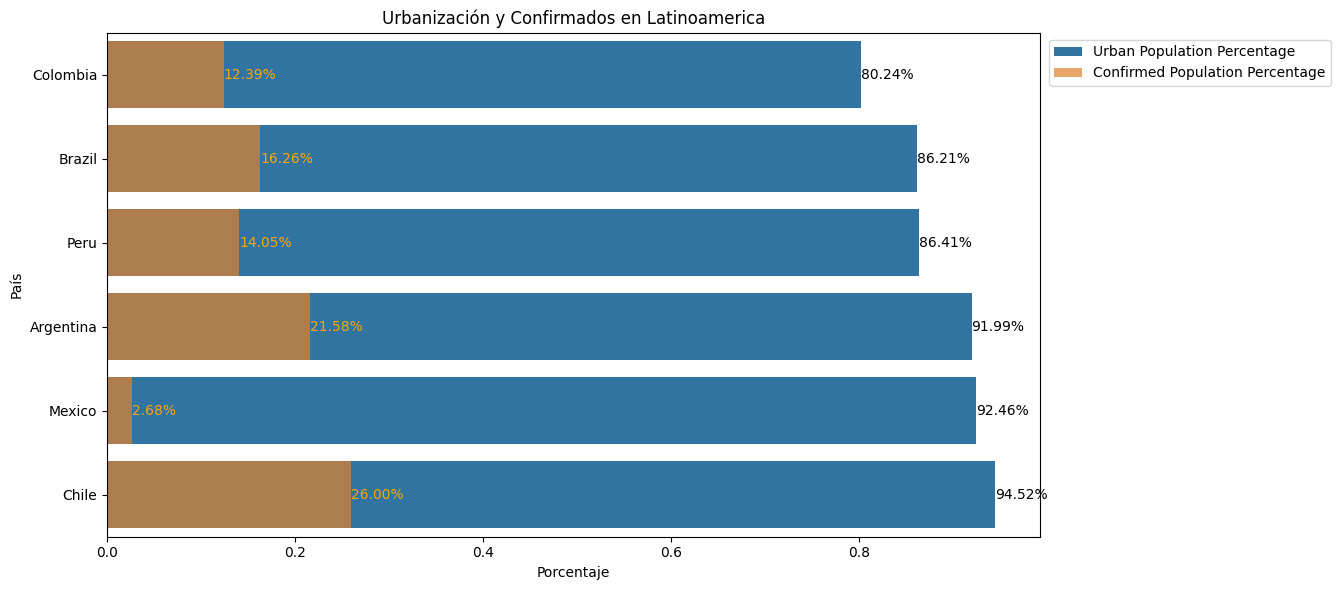

In [20]:
# - Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

El mayor impacto en la propagacion del virus fue Chile, no obstante como habiamos dicho antes, Chile manejo mejor la pandemia que otros, esto puede ser atribuible a la densidad de la poblacion en este pais. En su orden siguen Mexico, Argentina, Peru, Brasil y Colombia.

Al analizar ladensidad de la poblaci[on por grupos etareos se tiene:]

In [21]:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                    NaN 29381884.00   
2022-09-14                                    NaN 29381884.00   
2022-09-15                                    NaN 29381884.00   
2022-09-16                                    NaN 29381884.00   
2022-09-17                                    NaN 29381884.00   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02      19523766.00  ...                     147.09   
2021-01-03      19523766.00  ...                     147.09   
2021-01-04      19523766.00  ...                     147.09   
2021-01-05      19523766.00  ...                     147.09   
2021-01-06      19523766.00  ...                     147.09   
...                     ...  ...                        ...   
2022-09-13      14450757.00  ...                     146.37   
2022-09-14      14450757.00  ...                     146.37   
2022-09-15      14450757.00  ...                     146.37   
2022-09-16      14450757.00  ...                     146.37   
2022-09-17      14450757.00  ...                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   
...                                 ...              

In [22]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [23]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [24]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [25]:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [26]:
age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00

In [27]:
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [28]:
age_distribution_arg.loc["Argentina"]

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [29]:
age_distribution.loc["Argentina"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [30]:
age_distribution.loc["Argentina"].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [31]:
age_distribution_arg.index

Index(['Argentina'], dtype='object', name='country_name')

In [32]:
age_distribution_arg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

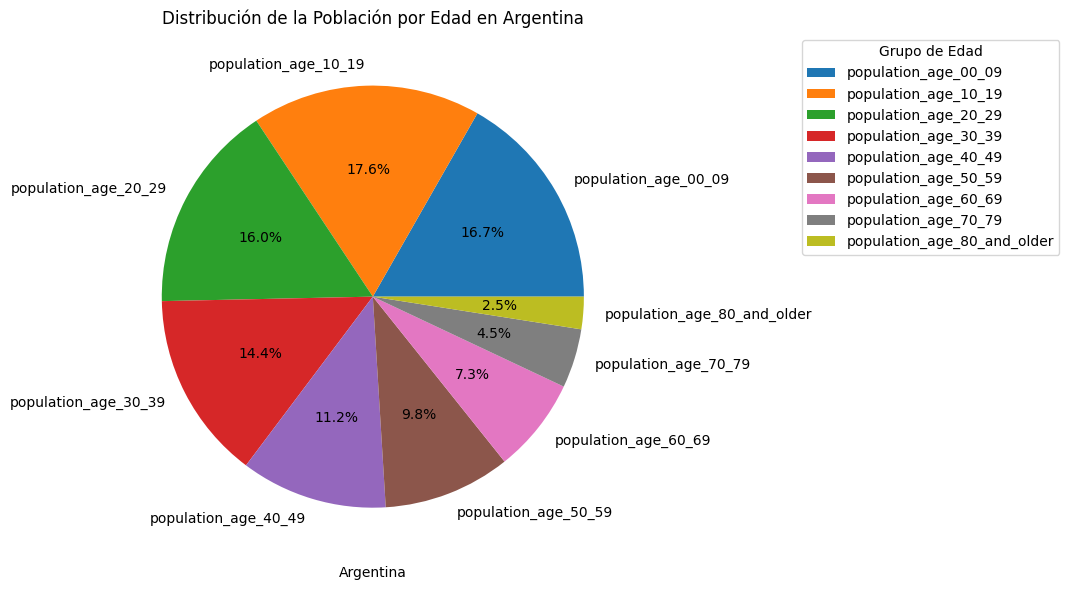

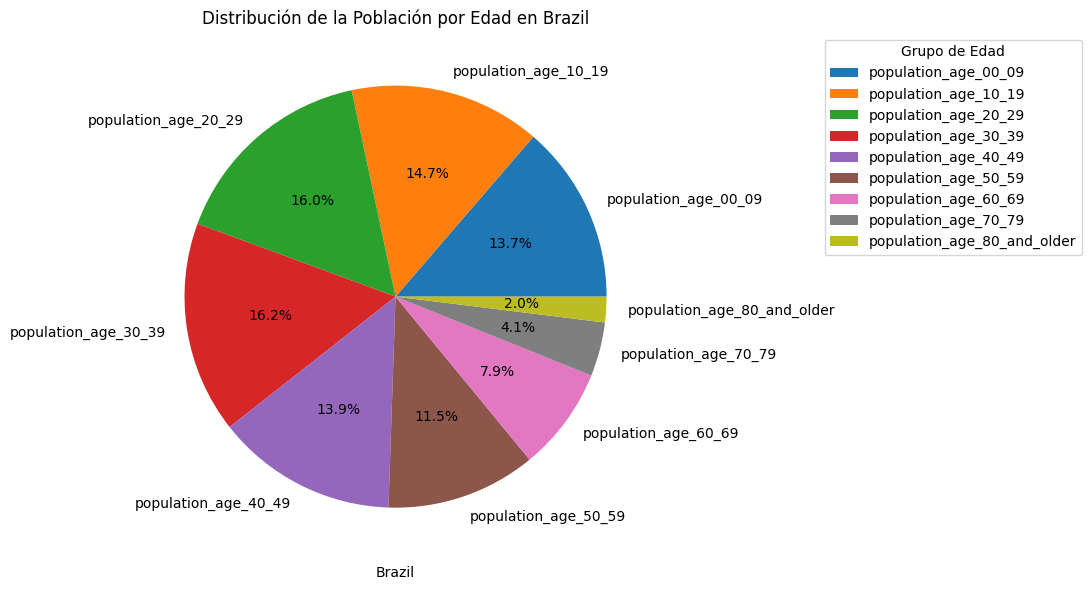

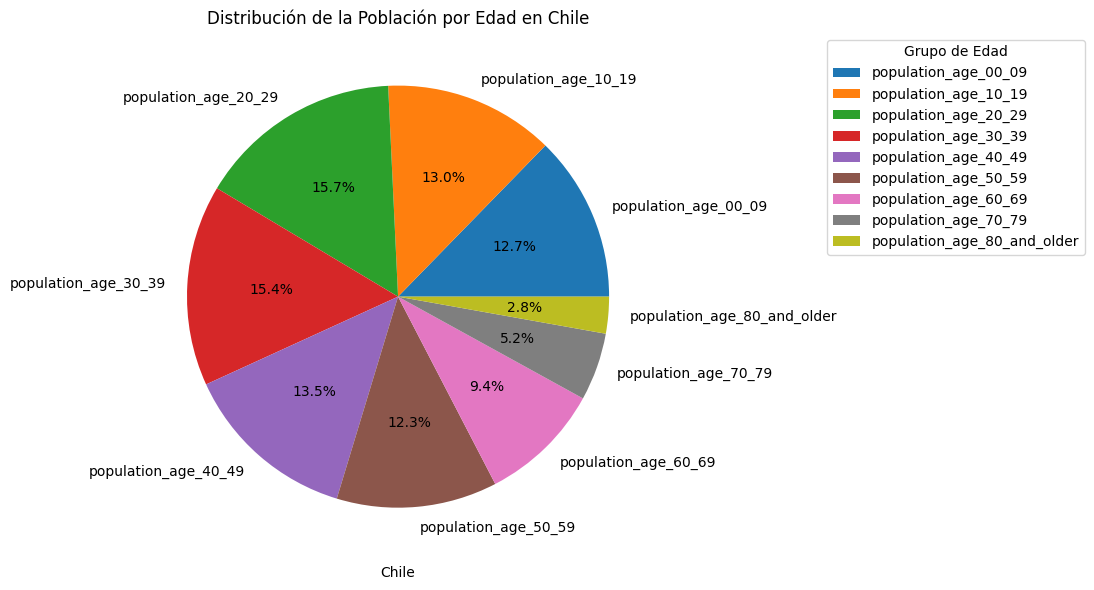

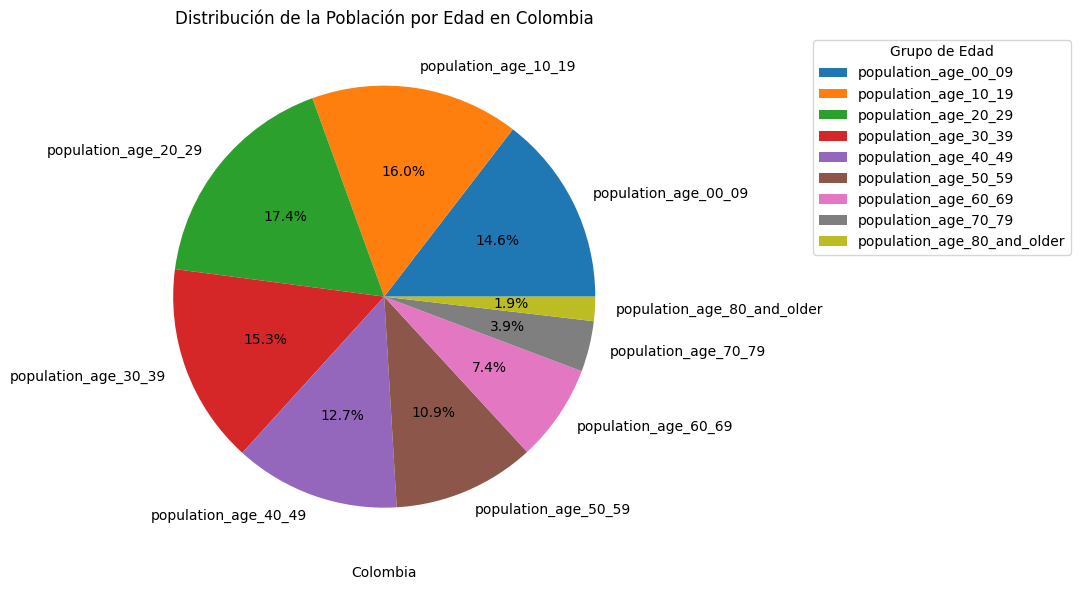

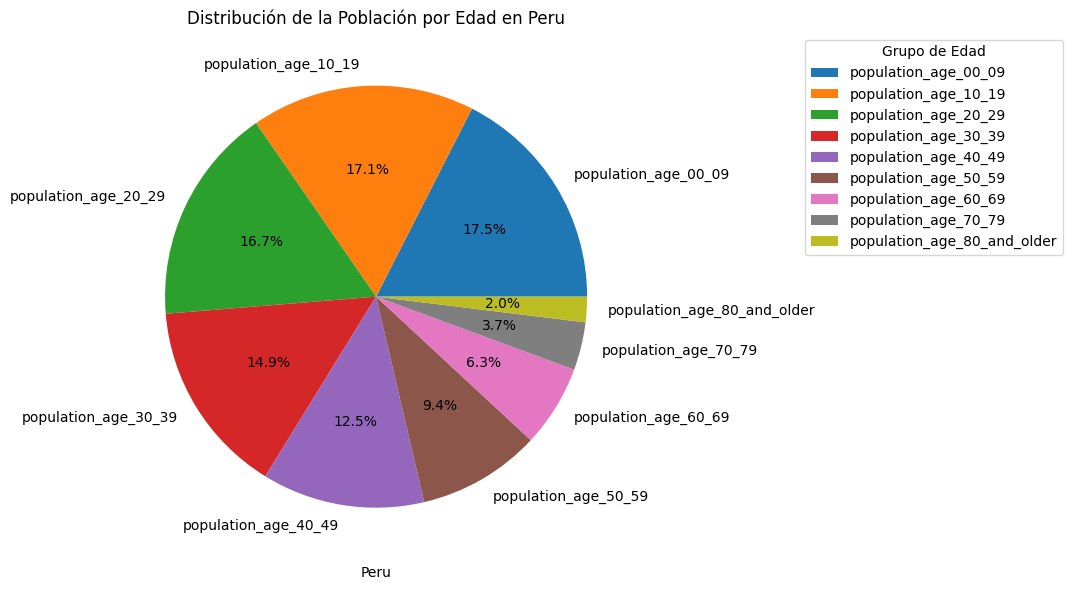

In [33]:
# Densidad de población por grupos de edad
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

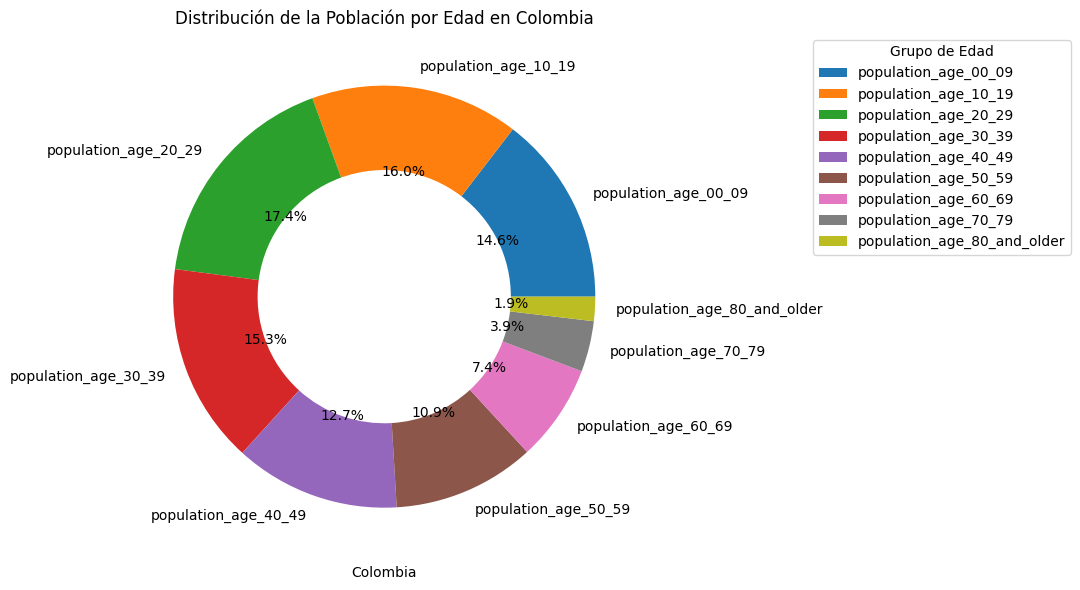

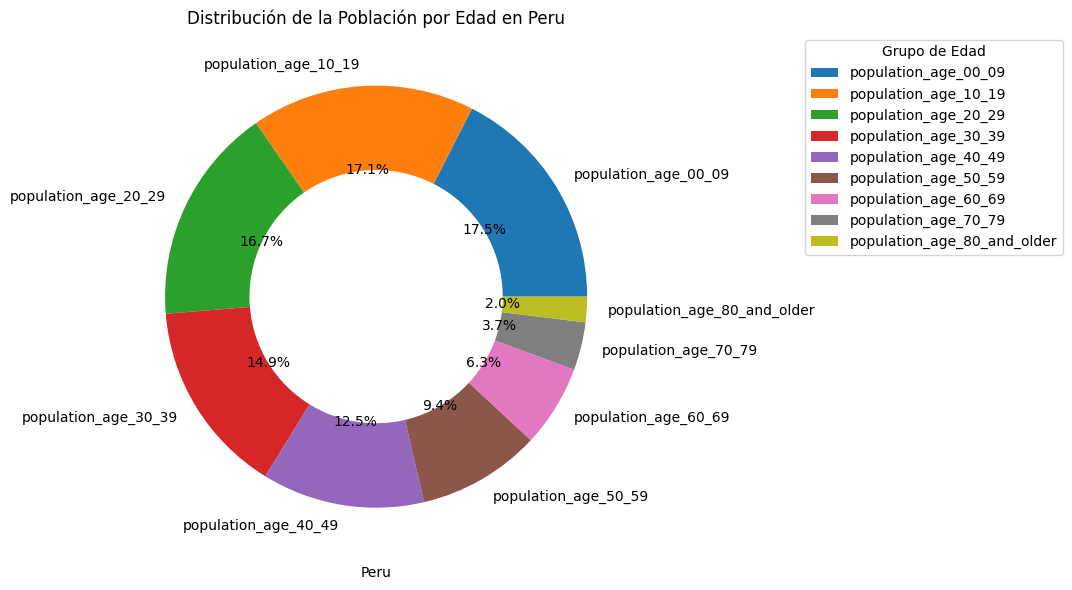

In [61]:
for pais in paises:
    plt.figure(figsize=(12, 6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%',
        wedgeprops={'width': 0.4},  # Ajusta el ancho de los "gajos" para crear el efecto de dona
    )

    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()


Los anteriores graficos muestran los diferentes porcentajes de los grupos etareos de la poblacion, lo cual se puede tener en cuenta para futuros analisis.

A continuacion se prosigue analizar las estrategias de vacunacion para hacer una comparativa entre los paises.

Dosis administradas por pais:

In [34]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [35]:
#Promedio de la poblacion de cada pais
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

A continuacion se presenta  un ratio que indica cuántas dosis de vacunas se han administrado por cada habitante (en promedio) en cada país.

In [36]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

Estrategia de vacuncion de los diferentes paises:

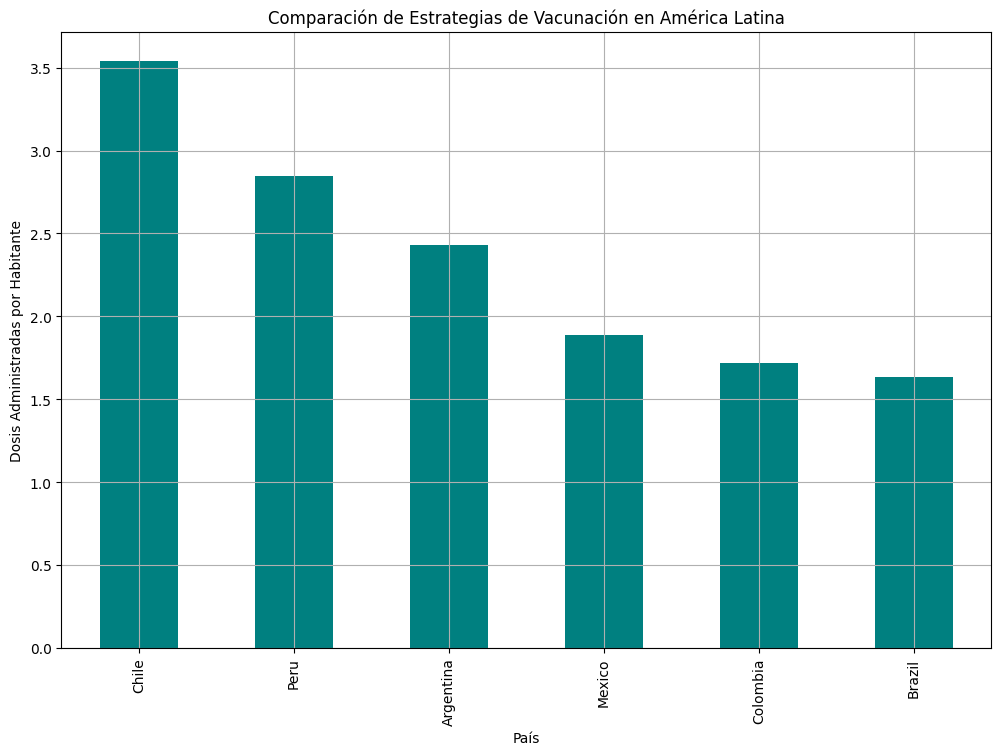

In [37]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

El gráfico de barras muestra la comparación de cuántas dosis de vacunas se han administrado por habitante en cada país de América Latina, ordenado de mayor a menor. El pais con mayor proporcion de vacunacion es Chile, aqui nuevamente se evidencia su buen desepe;o, seguido de Peru, Argentina y Mexico.
Este gráfico muestra la eficiencia o cobertura de las estrategias de vacunación implementadas. Los paises con menor desempeno podrian ser elegidos para colocar los nuevos Centros.

Ahora se revisara la diabetes pero en porcentajes respecto a los paises:

*Prevalencia de condiciones preexistentes en paises con altas y bajas tasas de mortalidad:

In [38]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

Paises con mayor numero de muertes:

In [39]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

Tres paises con menor numero de muertes:

In [40]:
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 3 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [41]:
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru        0.01
Chile       0.00
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

 Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

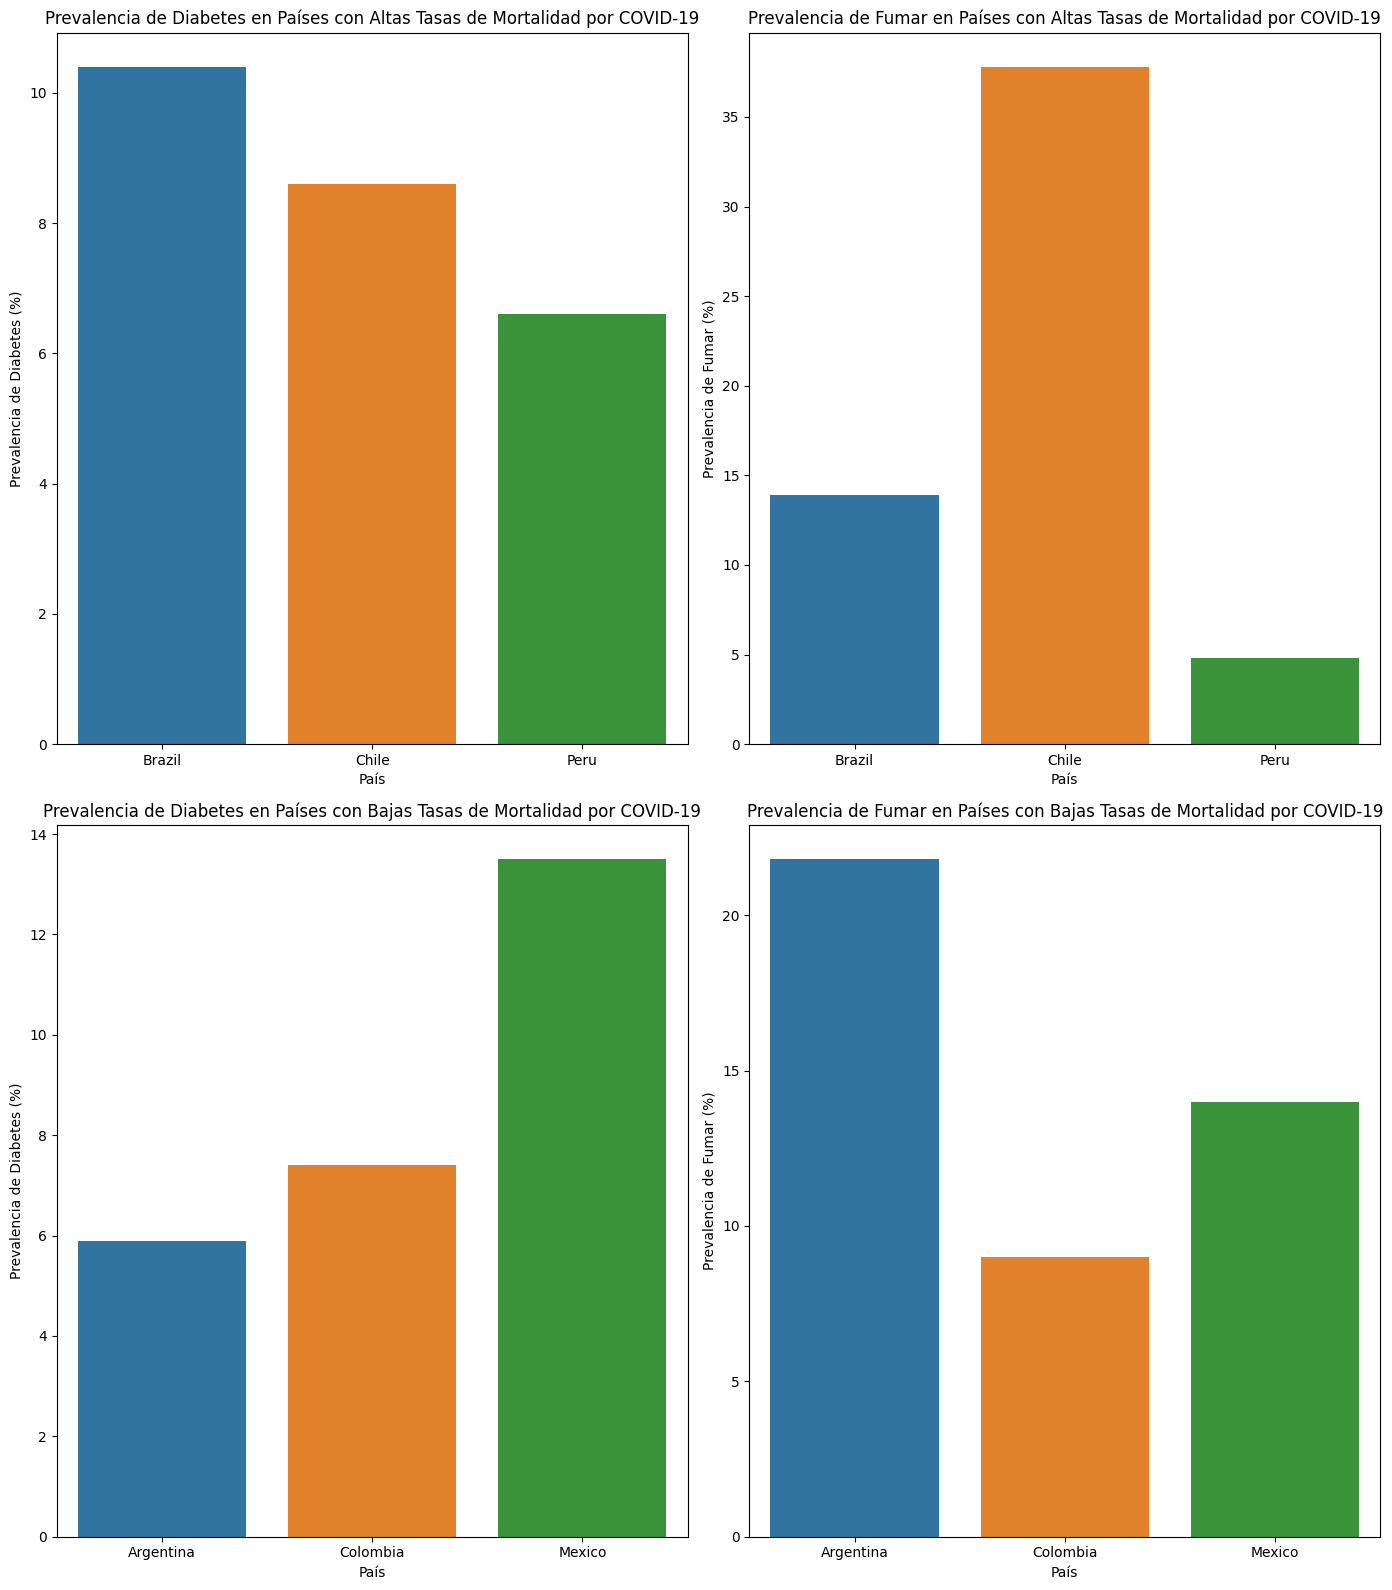

In [42]:


top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

La diabetes afecta en mayor medida a  Mexico y Brasil. El fumar es la variable que afecta mas a Chile y Argentina. No obstante, mientras que Brasil tiene una de las mayores tasas de mortalidad, Mexico aparece entre los menores igualmente pasa entre Chile y Argentina. Por lo cual es dificil establecer una correlacion entre situaciones preexistentes y las muertes por Covid. Por lo cual se deben analizar otras variables.

*Fatalidad por pais:

 Este índice se calcula dividiendo el número de fallecidos por el número de casos confirmados. Es decir, mide cuántas personas de las que contrajeron la enfermedad fallecieron.

In [43]:
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Mexico      0.01
Chile       0.01
Argentina   0.01
Brazil      0.02
Colombia    0.02
Peru        0.05
Name: case_fatality_rate, dtype: float64

In [44]:
#  Fatalidad por pais

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

El grafico evidencia que en Peru y Colombia fallecieron mas personas contagiadas que en los otros paises. No ostante, si se tienen en cuenta analisis anteriores los casos han disminuido, por la vacunacion y cuidado, medidas tomadas, entre otras.

Evolucion de la vacunacion en America Latina y reduccion de casos de Covid-19:

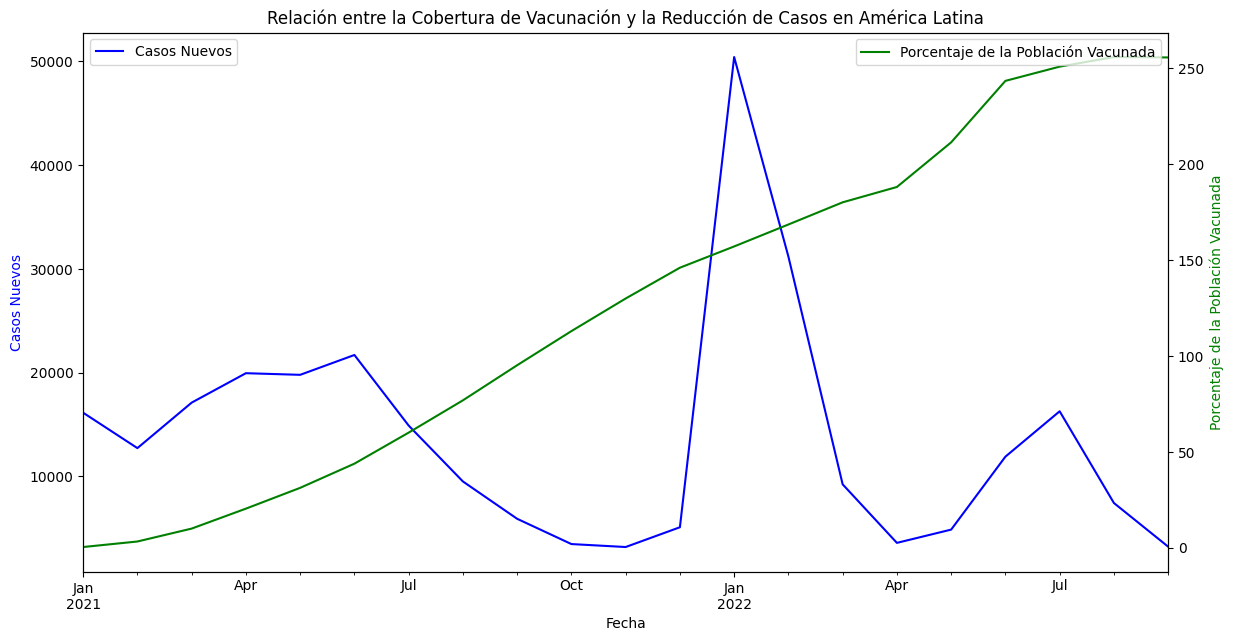

In [45]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

El grafico muestra una relacion directa entre los casos nuevos y el porcentaje de la poblacion vacunada, cuando se incrementa la poblacion vacunada la cantidad de casos se va estabilizando y reduciendo.

Evolucion de la mortalidad:

In [4]:
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

El grafico muestra la evolución de la tasa de mortalidad por COVID-19 a lo largo del tiempo en América Latina, con el fin de observar tendencias en los datos y cómo ha variado la gravedad de la pandemia en esta región del mundo. Este muestra como va cayendo de manera pronunciada a medida que avanzan las campanas de vacunacion.

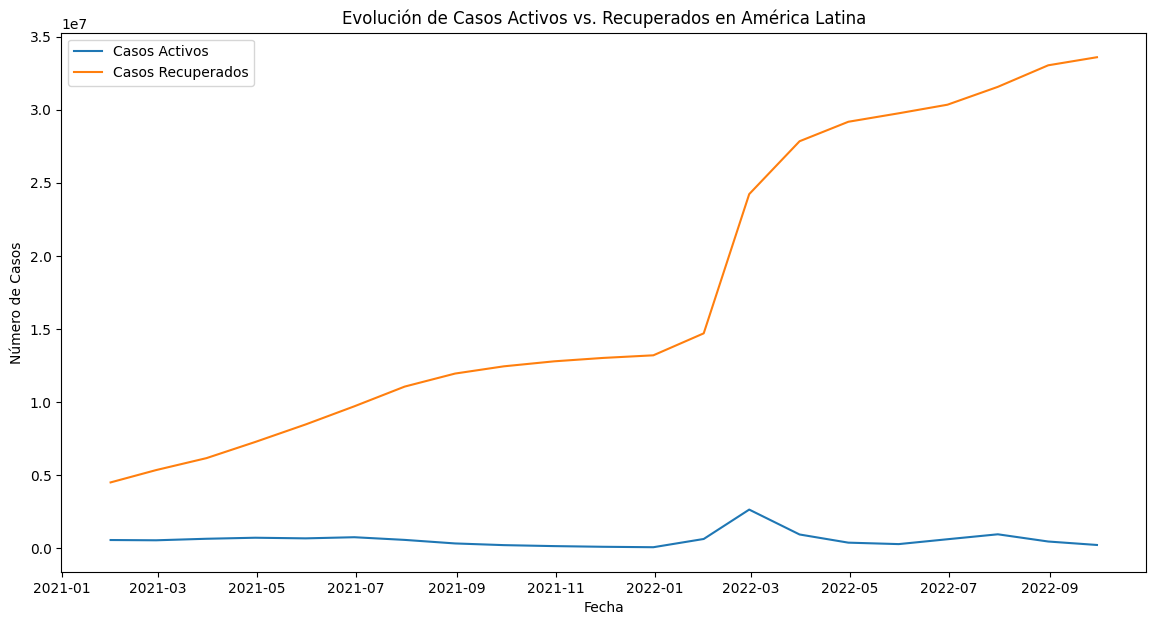

In [20]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

In [21]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Colombia          143388.0             5441021.0             141708.0
Brazil            177399.0            33706231.0             685203.0
Argentina              NaN                   NaN             129830.0
Chile                  NaN                   NaN              60822.0
Mexico                 NaN                   NaN              23985.0
Peru                   NaN                   NaN             216173.0

In [22]:
# Debo usar max() porque last no registra el acumulado de recovered
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Colombia          327734.0             5441021.0             155770.0
Brazil           3182910.0            33706231.0             685203.0
Argentina              NaN                   NaN             129830.0
Chile                  NaN                   NaN              60822.0
Mexico                 NaN                   NaN             304025.0
Peru                   NaN                   NaN             216173.0

In [23]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina           NaN                   NaN   
2022-09-17       Brazil           NaN                   NaN   
2022-09-17        Chile           NaN                   NaN   
2022-09-17     Colombia           NaN                   NaN   
2022-09-17       Mexico           NaN                   NaN   
2022-09-17         Peru           NaN                   NaN   

            cumulative_deceased  
date                             
2022-09-17                  NaN  
2022-09-17                  NaN  
2022-09-17                  NaN  
2022-09-17                  NaN  
2022-09-17                  NaN  
2022-09-17                  NaN

Recuperados y muertes en algunos paises: 

In [12]:


data = pd.read_csv('C:/Users/usuario/Desktop/Sandra/Phyton Class/m4_python/proyecto_integrador/DatosFinalesFiltrado.csv',sep=',')

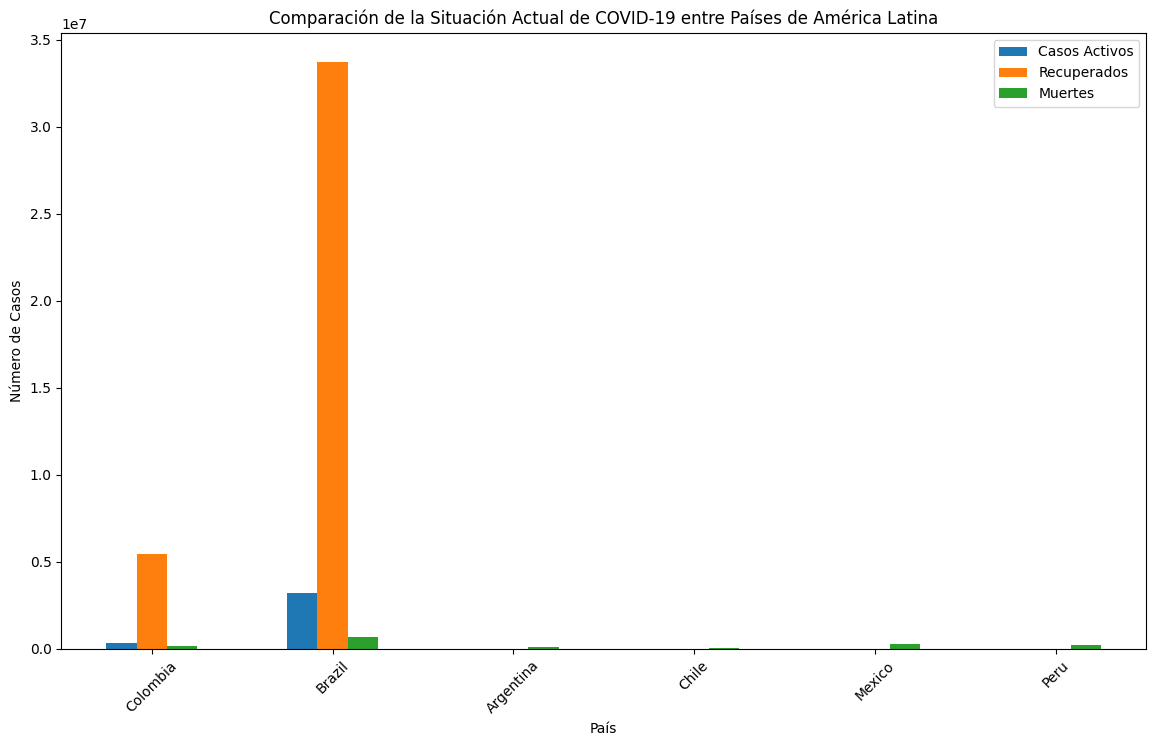

In [13]:

current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()